In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import geopandas as gpd

!pip install seaborn 
import seaborn as sns

# Creating the dataframes 

Let's create dataframes for all of our data throughout the different years and then check the number of columns in all of our datasets to see if they match.

In [3]:
# Creating the dataframes
for year in range(1995, 2024):
    globals()[f"df_{year}"] = pd.read_csv(f"SOF PUF {year}.csv")    # This creates a dataframe for each of our yearly datasets

# Checking the number of columns in some of the dataframes
print(len(df_1995.columns))
print(len(df_2000.columns))
print(len(df_2005.columns))
print(len(df_2010.columns))
print(len(df_2015.columns))
print(len(df_2020.columns))

33
32
31
42
48
45


We can see that the datasets have varying numbers of columns. However, we only want key information including:<br><br>
**Demographic Data:** _Age, Sex, Relationship to Household Head_<br>
**Geographic Data:** _Region, Country_ <br> 
**Education Data:** _Highest Education Level Attained_<br>
**Work Data:** _Reason for Moving Abroad_ <br>
**Remittances:** _Whether or not there are cash remittances, Total Cash  Remittances, Cash Amt Brought Home_<br>

This leaves a total of 11 major columns. Let's view the dataframes, filter out the unecessary columns, and rename them to keep the naming system consistent!

# Region Mapping

In [482]:
# Region Names 
REGN_code_to_name = {
    "1": "Region I (Ilocos Region)",
    "2": "Region II (Cagayan Valley)",
    "3": "Region III (Central Luzon)",
    "4": "Region IV-A (CALABARZON)",
    "5": "Region V (Bicol Region)",
    "6": "Region VI (Western Visayas)",
    "7": "Region VII (Central Visayas)",
    "8": "Region VIII (Eastern Visayas)",
    "9": "Region IX (Zamboanga Peninsula)",
    "01": "Region I (Ilocos Region)",
    "02": "Region II (Cagayan Valley)",
    "03": "Region III (Central Luzon)",
    "04": "Region IV-A (CALABARZON)",
    "05": "Region V (Bicol Region)",
    "06": "Region VI (Western Visayas)",
    "07": "Region VII (Central Visayas)",
    "08": "Region VIII (Eastern Visayas)",
    "09": "Region IX (Zamboanga Peninsula)",
    "10": "Region X (Northern Mindanao)",
    "11": "Region XI (Davao Region)",
    "12": "Region XII (SOCCSKSARGEN)",
    "13": "Region XIII (Caraga)",
    "14": "Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)",
    "15": "Cordillera Administrative Region (CAR)",
    "16": "National Capital Region (NCR)",
    "17": 'MIMAROPA Region',
    "19": "Autonomous Region in Muslim Mindanao (ARMM)",
    "41": "Region IV-A (CALABARZON)",
    "42": 'MIMAROPA Region',
    
}

# Country Mapping

In [483]:
# 1995 to 2001 Country Mapping

CTRY_code_to_name_1995to2001 = {
    "1": "AUSTRALIA",
    "2": "AFGHANISTAN",
    "3": "ALBANA",
    "4": "ALGERIA",
    "5": "ANGOLA",
    "6": "ANTIGUA",
    "7": "ARGENTINA",
    "8": "ARUBA",
    "9": "AUSTRIA",
    "10": "BAHRAIN",
    "11": "BANGLADESH",
    "12": "BELGIUM",
    "13": "BOLIVIA",
    "14": "BRAZIL",
    "15": "BRUNEI DARUSSALAM",
    "16": "BULGARIA",
    "17": "BURMA",
    "18": "CANADA",
    "19": "CAPE VERDE",
    "20": "CHILE",
    "21": "CHINA, PEOPLE'S REPUBLIC OF",
    "22": "COLOMBIA",
    "23": "COSTA RICA",
    "24": "CUBA",
    "25": "CZECHOSLOVAKIA",
    "26": "DENMARK",
    "27": "DOMINICAN REPUBLIC",
    "28": "EGYPT",
    "29": "EL SALVADOR",
    "30": "FINLAND",
    "31": "FIJI",
    "32": "FRANCE",
    "33": "GERMANY, FEDERAL REP. OF",
    "34": "GHANA",
    "35": "GREECE",
    "36": "GUAM",
    "37": "GUATEMALA",
    "38": "HONDURAS, REP. OF",
    "39": "HONGKONG",
    "40": "HUNGARY",
    "41": "ICELAND",
    "42": "INDIA",
    "43": "INDONESIA",
    "44": "IRAN, ISLAMIC REP. OF",
    "45": "IRAQ",
    "46": "ISRAEL",
    "47": "ITALY",
    "48": "KAMPUCHEA, DEMOCRATIC REPUBLIC",
    "49": "KENYA",
    "50": "KOREA, SOUTH",
    "51": "KUWAIT",
    "52": "JAPAN",
    "54": "LEBANON",
    "55": "LIBERIA",
    "56": "LIBYAN ARAB JAMAHIRIYA",
    "57": "MALAYSIA",  
    "58": "MARSHALL ISLANDS, REP. OF",
    "59": "MEXICO",
    "60": "MONACO",
    "61": "MOROCCO",
    "62": "NEPAL",
    "63": "NETHERLANDS",
    "64": "NEW ZEALANDS",
    "65": "NIGERIA",
    "66": "NORWAY",
    "67": "OMAN",
    "68": "PAKISTAN",
    "69": "PALAU",
    "70": "PANAMA",
    "71": "PAPUA NEW GUINEA",
    "72": "PARAGUAY",
    "73": "PERU",
    "74": "POLAND",
    "75": "PORTUGAL",
    "76": "PORTUGUESE TIMOR AND DEPENDENCIES",
    "77": "PUERTO RICO",
    "78": "QATAR",
    "79": "ROMANIA",
    "80": "SAIPAN",
    "81": "SAUDI ARABIA, KINGDOM OF",
    "82": "SINGAPORE",
    "83": "SPAIN",  
    "84": "SRI LANKA",
    "85": "SUDAN",
    "86": "SWEDEN",
    "87": "SWITZERLAND",  
    "88": "SYRIAN ARAB REPUBLIC",
    "89": "TAIWAN",
    "90": "THAILAND",
    "91": "TRUST TERRITORY OF PACIFIC ISLAND",
    "92": "TUNISIA",
    "93": "UNION OF SOVIET SOCIALIST REP.",
    "94": "UNITED ARAB EMIRATES",
    "95": "UNITED KINGDOM",
    "96": "UNITED STATES OF AMERICA",
    "97": "URUGUAY",
    "98": "VENEZUELA",
    "99": "VIETNAM",
    "100": "ZAIRE, REPUBLIC OF",
    "101": "ZAMBIA",
    "102": "ZIMBABWE",
    "888": "OTHER COUNTRIES",
    "999": "COUNTRY NOT REPORTED",
    "001": "AUSTRALIA",
    "002": "AFGHANISTAN",
    "003": "ALBANA",
    "004": "ALGERIA",
    "005": "ANGOLA",
    "006": "ANTIGUA",
    "007": "ARGENTINA",
    "008": "ARUBA",
    "009": "AUSTRIA",
    "010": "BAHRAIN",
    "011": "BANGLADESH",
    "012": "BELGIUM",
    "013": "BOLIVIA",
    "014": "BRAZIL",
    "015": "BRUNEI DARUSSALAM",
    "016": "BULGARIA",
    "017": "BURMA",
    "018": "CANADA",
    "019": "CAPE VERDE",
    "020": "CHILE",
    "021": "CHINA, PEOPLE'S REPUBLIC OF",
    "022": "COLOMBIA",
    "023": "COSTA RICA",
    "024": "CUBA",
    "025": "CZECHOSLOVAKIA",
    "026": "DENMARK",
    "027": "DOMINICAN REPUBLIC",
    "028": "EGYPT",
    "029": "EL SALVADOR",
    "030": "FINLAND",
    "031": "FIJI",
    "032": "FRANCE",
    "033": "GERMANY, FEDERAL REP. OF",
    "034": "GHANA",
    "035": "GREECE",
    "036": "GUAM",
    "037": "GUATEMALA",
    "038": "HONDURAS, REP. OF",
    "039": "HONGKONG",
    "040": "HUNGARY",
    "041": "ICELAND",
    "042": "INDIA",
    "043": "INDONESIA",
    "044": "IRAN, ISLAMIC REP. OF",
    "045": "IRAQ",
    "046": "ISRAEL",
    "047": "ITALY",
    "048": "KAMPUCHEA, DEMOCRATIC REPUBLIC",
    "049": "KENYA",
    "050": "KOREA, SOUTH",
    "051": "KUWAIT",
    "052": "JAPAN",
    "054": "LEBANON",
    "055": "LIBERIA",
    "056": "LIBYAN ARAB JAMAHIRIYA",
    "057": "MALAYSIA",
    "058": "MARSHALL ISLANDS, REP. OF",
    "059": "MEXICO",
    "060": "MONACO",
    "061": "MOROCCO",
    "062": "NEPAL",
    "063": "NETHERLANDS",
    "064": "NEW ZEALANDS",
    "065": "NIGERIA",
    "066": "NORWAY",
    "067": "OMAN",
    "068": "PAKISTAN",
    "069": "PALAU",
    "070": "PANAMA",
    "071": "PAPUA NEW GUINEA",
    "072": "PARAGUAY",
    "073": "PERU",
    "074": "POLAND",
    "075": "PORTUGAL",
    "076": "PORTUGUESE TIMOR AND DEPENDENCIES",
    "077": "PUERTO RICO",
    "078": "QATAR",
    "079": "ROMANIA",
    "080": "SAIPAN",
    "081": "SAUDI ARABIA, KINGDOM OF",
    "082": "SINGAPORE",
    "083": "SPAIN",
    "084": "SRI LANKA",
    "085": "SUDAN",
    "086": "SWEDEN",
    "087": "SWITZERLAND",
    "088": "SYRIAN ARAB REPUBLIC",
    "089": "TAIWAN",
    "090": "THAILAND",
    "091": "TRUST TERRITORY OF PACIFIC ISLAND",
    "092": "TUNISIA",
    "093": "UNION OF SOVIET SOCIALIST REP.",
    "094": "UNITED ARAB EMIRATES",
    "095": "UNITED KINGDOM",
    "096": "UNITED STATES OF AMERICA",
    "097": "URUGUAY",
    "098": "VENEZUELA",
    "099": "VIETNAM",
}

In [484]:
# 2002-2003 Country Mapping

CTRY_code_to_name_2002to2003 = {
    "1": "AUSTRALIA",
    "2": "AFGHANISTAN",
    "3": "ALBANIA",
    "4": "ALGERIA",
    "5": "ANGOLA",
    "6": "ANTIGUA",
    "7": "ARGENTINA",
    "8": "ARUBA",
    "9": "AUSTRIA",
    "10": "BAHRAIN",
    "11": "BANGLADESH",
    "12": "BELGIUM",
    "13": "BOLIVIA",
    "14": "BRAZIL",
    "15": "BRUNEI DARUSSALAM",
    "16": "BULGARIA",
    "17": "BURMA",
    "18": "CANADA",
    "19": "CAPE VERDE",
    "20": "CHILE",
    "21": "CHINA, PEOPLE'S REPUBLIC OF",
    "22": "COLOMBIA",
    "23": "COSTA RICA",
    "24": "CUBA",
    "25": "CZECHOSLOVAKIA",
    "26": "DENMARK",
    "27": "DOMINICAN REPUBLIC",
    "28": "EGYPT",
    "29": "EL SALVADOR",
    "30": "FINLAND",
    "31": "FIJI",
    "32": "FRANCE",
    "33": "GERMANY",
    "34": "GHANA",
    "35": "GREECE",
    "36": "GUAM",
    "37": "GUATEMALA",
    "38": "HONDURAS",
    "39": "HONGKONG",
    "40": "HUNGARY",
    "41": "ICELAND",
    "42": "INDIA",
    "43": "INDONESIA",
    "44": "IRAN",
    "45": "IRAQ",
    "46": "ISRAEL",
    "47": "ITALY",
    "48": "KAMPUCHEA, DEMOCRATIC REPUBLIC (CAMBODIA)",
    "49": "KENYA",
    "50": "KOREA, SOUTH",
    "51": "KUWAIT",
    "52": "JAPAN",
    "53": "JORDAN",
    "54": "LEBANON",
    "55": "LIBERIA",
    "56": "LIBYAN ARAB JAMAHIRIYA",
    "57": "MALAYSIA",
    "58": "MARSHALL ISLANDS, REP OF",
    "59": "MEXICO",
    "60": "MONACO",
    "61": "MOROCCO",
    "62": "NEPAL",
    "63": "NETHERLANDS",
    "64": "NEW ZEALANDS (EXCLUDES WESTERN SAMOA)",
    "65": "NIGERIA",
    "66": "NORWAY",
    "67": "OMAN",
    "68": "PAKISTAN, ISLAMIC REP OF",
    "69": "PALAU, REP OF",
    "70": "PANAMA",
    "71": "PAPUA NEW GUNEA",
    "72": "PARAGUAY",
    "73": "PERU",
    "74": "POLAND",
    "75": "PORTUGAL",
    "76": "PORTUGUESE TIMOR AND DEPENDENCIES",
    "77": "PUERTO RICO",
    "78": "QATAR",
    "79": "ROMANIA",
    "80": "SAIPAN",
    "81": "SAUDI ARABIA, KINGDOM OF",
    "82": "SINGAPORE",
    "83": "SPAIN",
    "84": "SRI LANKA",
    "85": "SUDAN",
    "86": "SWEDEN",
    "87": "SWITZERLAND",
    "88": "SYRIAN ARAB REPUBLIC",
    "89": "TAIWAN",
    "90": "THAILAND",
    "91": "TRUST TERRITORY OF PACIFIC ISLAND (EXCLUDING MARSHALL AND PALAU)",
    "92": "TUNISIA",
    "93": "UNION OF SOVIET SOCIALIST REPUBLIC",
    "94": "UNITED ARAB EMIRATES",
    "95": "UNITED KINGDOM (GREAT BRITAIN)",
    "96": "UNITED STATES OF AMERICA",
    "97": "URUGUAY",
    "98": "VENEZUELA",
    "99": "VIETNAM",
    "100": "ZAIRE, REPUBLIC OF",
    "101": "ZAMBIA",
    "102": "ZIMBABWE",
    "103": "CYPRUS",
    "104": "IRELAND",
    "888": "OTHER COUNTRIES",
    "999": "COUNTRY NOT REPORTED"
}

In [485]:
# 2004-2010 Mapping

CTRY_code_to_name_2004to2010 = {
    "100": "ALL COUNTRIES",
    "211": "EAST ASIA",
    "212": "JAPAN",
    "213": "TAIWAN",
    "214": "OTHER COUNTRIES IN EAST ASIA",
    "221": "SOUTHEAST AND SOUTH CENTRAL ASIA",
    "222": "SINGAPORE",
    "223": "OTHER COUNTRIES IN SE & SC ASIA",
    "231": "WESTERN ASIA",
    "232": "QATAR",
    "233": "SAUDI ARABIA",
    "234": "UNITED ARAB EMIRATES",
    "235": "OTHER COUNTRIES IN WESTERN ASIA",
    "300": "AUSTRALIA",
    "400": "EUROPE",
    "500": "NORTH AND SOUTH AMERICA",
    "600": "OTHER COUNTRIES"
}

In [486]:
# 2011-2013 Mapping
CTRY_code_to_name_2011to2013 = {
    "1": "AUSTRALIA",
    "2": "AFGHANISTAN",
    "3": "ALBANIA",
    "4": "ALGERIA",
    "5": "ANGOLA",
    "6": "ANTIGUA",
    "7": "ARGENTINA",
    "8": "ARUBA",
    "9": "AUSTRIA",
    "10": "BAHRAIN",
    "11": "BANGLADESH",
    "12": "BELGIUM",
    "13": "BOLIVIA",
    "14": "BRAZIL",
    "15": "BRUNEI DARUSSALAM",
    "16": "BULGARIA",
    "17": "BURMA",
    "18": "CANADA",
    "19": "CAPE VERDE",
    "20": "CHILE",
    "21": "CHINA, PEOPLE'S REPUBLIC OF",
    "22": "COLOMBIA",
    "23": "COSTA RICA",
    "24": "CUBA",
    "25": "CZECHOSLOVAKIA",
    "26": "DENMARK",
    "27": "DOMINICAN REPUBLIC",
    "28": "EGYPT",
    "29": "EL SALVADOR",
    "30": "FINLAND",
    "31": "FIJI",
    "32": "FRANCE",
    "33": "GERMANY",
    "34": "GHANA",
    "35": "GREECE",
    "36": "GUAM",
    "37": "GUATEMALA",
    "38": "HONDURAS",
    "39": "HONGKONG",
    "40": "HUNGARY",
    "41": "ICELAND",
    "42": "INDIA",
    "43": "INDONESIA",
    "44": "IRAN",
    "45": "IRAQ",
    "46": "ISRAEL",
    "47": "ITALY",
    "48": "KAMPUCHEA, DEMOCRATIC REPUBLIC (CAMBODIA)",
    "49": "KENYA",
    "50": "KOREA, SOUTH",
    "51": "KUWAIT",
    "52": "JAPAN",
    "53": "JORDAN",
    "54": "LEBANON",
    "55": "LIBERIA",
    "56": "LIBYAN ARAB JAMAHIRIYA",
    "57": "MALAYSIA",
    "58": "MARSHALL ISLANDS, REP OF",
    "59": "MEXICO",
    "60": "MONACO",
    "61": "MOROCCO",
    "62": "NEPAL",
    "63": "NETHERLANDS",
    "64": "NEW ZEALANDS (EXCLUDES WESTERN SAMOA)",
    "65": "NIGERIA",
    "66": "NORWAY",
    "67": "OMAN",
    "68": "PAKISTAN, ISLAMIC REP OF",
    "69": "PALAU, REP OF",
    "70": "PANAMA",
    "71": "PAPUA NEW GUNEA",
    "72": "PARAGUAY",
    "73": "PERU",
    "74": "POLAND",
    "75": "PORTUGAL",
    "76": "PORTUGUESE TIMOR AND DEPENDENCIES",
    "77": "PUERTO RICO",
    "78": "QATAR",
    "79": "ROMANIA",
    "80": "SAIPAN",
    "81": "SAUDI ARABIA, KINGDOM OF",
    "82": "SINGAPORE",
    "83": "SPAIN",
    "84": "SRI LANKA",
    "85": "SUDAN",
    "86": "SWEDEN",
    "87": "SWITZERLAND",
    "88": "SYRIAN ARAB REPUBLIC",
    "89": "TAIWAN",
    "90": "THAILAND",
    "91": "TRUST TERRITORY OF PACIFIC ISLAND (EXCLUDING MARSHALL AND PALAU)",
    "92": "TUNISIA",
    "93": "UNION OF SOVIET SOCIALIST REPUBLIC",
    "94": "UNITED ARAB EMIRATES",
    "95": "UNITED KINGDOM (GREAT BRITAIN)",
    "96": "UNITED STATES OF AMERICA",
    "97": "URUGUAY",
    "98": "VENEZUELA",
    "99": "VIETNAM",
    "100": "ZAIRE, REPUBLIC OF",
    "101": "ZAMBIA",
    "102": "ZIMBABWE",
    "103": "CYPRUS",
    "104": "IRELAND",
    "888": "OTHER COUNTRIES",
    "999": "COUNTRY NOT REPORTED"
}

In [487]:
# 2014-2023 Mapping

CTRY_code_to_name_2014to2023 = {
    "100": "AFRICA",
    "211": "HONGKONG",
    "212": "JAPAN",
    "213": "TAIWAN",
    "214": "OTHER COUNTRIES IN EAST ASIA",
    "221": "MALAYSIA",
    "222": "SINGAPORE",
    "223": "OTHER COUNTRIES IN SE & SC ASIA",
    "231": "KUWAIT",
    "232": "QATAR",
    "233": "SAUDI ARABIA",
    "234": "UNITED ARAB EMIRATES",
    "235": "OTHER COUNTRIES IN WESTERN ASIA",
    "300": "AUSTRALIA",
    "400": "EUROPE",
    "500": "NORTH AND SOUTH AMERICA",
    "600": "OTHER COUNTRIES"
}

# 1995-2020 Data

In [488]:
# Taking a first look at one of the datasets 
df_1995

,REGN,PROV,URB,HHCN,REL,SEX,AGE,TMSLEFT,DTLEFTMONTH,DTLEFTYEAR,MSTAT,HGRADE,USOCC,REASON,CTRY,STAY,RET,DTRETMON,DTRETYR,WORK1,OCUP1,DTEXPMON,DTEXPYR,WORK2,OCUP2,NOMONTH,CASHREM,CASHAMT,MODE,CASHHOME,INKIND,KINDAMT,SWGT
0,13,39,1,649,2,1,36,2,7,94,2,5,X10,1,81,6,1,6.0,95.0,1.0,X20,NaN,NaN,NaN,NaN,9.0,1,10000.0,2.0,10000.0,2,NaN,0.4443
1,13,39,1,470,2,1,43,3,1,95,2,6,X10,1,52,12,2,NaN,NaN,NaN,NaN,1.0,96.0,1.0,42,8.0,1,75000.0,2.0,NaN,2,NaN,0.4443
2,13,39,1,85,2,1,40,2,1,93,2,5,552,1,26,24,2,NaN,NaN,NaN,NaN,88.0,88.0,1.0,552,24.0,1,12000.0,1.0,NaN,2,NaN,0.4443
3,13,39,1,92,2,2,36,1,3,93,2,4,599,1,81,36,2,NaN,NaN,NaN,NaN,12.0,95.0,1.0,599,30.0,1,16000.0,4.0,NaN,2,NaN,0.4443
4,13,39,1,92,6,2,37,1,7,93,2,3,541,1,52,24,2,NaN,NaN,NaN,NaN,88.0,88.0,1.0,541,26.0,2,NaN,NaN,NaN,2,NaN,0.4443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,15,70,2,341,1,1,33,1,12,93,2,2,643,3,57,18,1,3.0,94.0,1.0,452,NaN,NaN,NaN,NaN,12.0,2,NaN,NaN,NaN,2,NaN,0.7197
2033,15,70,2,343,3,1,20,1,5,95,1,4,643,3,57,12,2,NaN,NaN,NaN,NaN,6.0,96.0,1.0,949,4.0,2,NaN,NaN,NaN,2,NaN,0.7197
2034,15,70,2,343,3,2,25,1,6,95,4,2,Z20,3,57,12,2,NaN,NaN,NaN,NaN,12.0,95.0,1.0,451,3.0,2,NaN,NaN,NaN,1,1200.0,0.7197
2035,15,70,2,344,1,1,35,4,9,94,2,1,614,3,57,12,1,3.0,95.0,1.0,959,NaN,NaN,NaN,NaN,5.0,2,NaN,NaN,NaN,2,NaN,0.7197


In [489]:
# 1995 Dataset

# This allows us to see all columns
pd.set_option('display.max_columns', None)

# Filtering the 1995 file
df_1995_filtered = df_1995[['AGE','SEX','REL','REGN','CTRY','HGRADE','REASON',
                            'CASHREM','CASHAMT','CASHHOME']].copy()

# Adding a year column
df_1995_filtered['YEAR']=1995

# Renaming Regions using the Region Mapping
df_1995_filtered['REGN'] = df_1995_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_1995_filtered['REGN'] = df_1995_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_1995_filtered['CTRY'] = df_1995_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_1995_filtered['CTRY'] = df_1995_filtered['CTRY'].map(CTRY_code_to_name_1995to2001)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_1995_filtered = df_1995_filtered[df_1995_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Showing dataframe
df_1995_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,36,1,2,Region XIII (Caraga),"SAUDI ARABIA, KINGDOM OF",5,1,1,10000.0,10000.0,1995
1,43,1,2,Region XIII (Caraga),JAPAN,6,1,1,75000.0,NaN,1995
2,40,1,2,Region XIII (Caraga),DENMARK,5,1,1,12000.0,NaN,1995
3,36,2,2,Region XIII (Caraga),"SAUDI ARABIA, KINGDOM OF",4,1,1,16000.0,NaN,1995
4,37,2,6,Region XIII (Caraga),JAPAN,3,1,2,NaN,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...
2032,33,1,1,Cordillera Administrative Region (CAR),MALAYSIA,2,3,2,NaN,NaN,1995
2033,20,1,3,Cordillera Administrative Region (CAR),MALAYSIA,4,3,2,NaN,NaN,1995
2034,25,2,3,Cordillera Administrative Region (CAR),MALAYSIA,2,3,2,NaN,NaN,1995
2035,35,1,1,Cordillera Administrative Region (CAR),MALAYSIA,1,3,2,NaN,NaN,1995


In [490]:
# Filtering 1996 data
df_1996_filtered = df_1996[['AGE','SEX','REL','REGN','CTRY','HGRADE', 'REASON',
                            'CASHREM','CASHAMT','CASHHOME']].copy()

# Adding a year column
df_1996_filtered['YEAR']=1996

# Renaming Regions using the Region Mapping
df_1996_filtered['REGN'] = df_1996_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_1996_filtered['REGN'] = df_1996_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_1996_filtered['CTRY'] = df_1996_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_1996_filtered['CTRY'] = df_1996_filtered['CTRY'].map(CTRY_code_to_name_1995to2001)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_1996_filtered = df_1996_filtered[df_1996_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

df_1996_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,25,2,3,Region I (Ilocos Region),HONGKONG,5,1,1,1500.0,NaN,1996
1,38,2,3,Region I (Ilocos Region),BRUNEI DARUSSALAM,4,1,1,500.0,NaN,1996
4,39,2,2,Region I (Ilocos Region),SINGAPORE,6,1,2,NaN,NaN,1996
5,38,2,2,Region I (Ilocos Region),HONGKONG,5,1,1,28000.0,NaN,1996
6,32,2,3,Region I (Ilocos Region),"SAUDI ARABIA, KINGDOM OF",5,1,1,5000.0,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...
2252,40,1,1,National Capital Region (NCR),UNITED ARAB EMIRATES,5,1,1,61248.0,NaN,1996
2253,46,2,2,National Capital Region (NCR),"GERMANY, FEDERAL REP. OF",6,3,2,NaN,NaN,1996
2255,39,2,3,National Capital Region (NCR),TAIWAN,6,1,2,NaN,NaN,1996
2256,32,2,3,National Capital Region (NCR),SAIPAN,6,1,2,NaN,NaN,1996


In [491]:
# Filtering 1997 data
df_1997_filtered = df_1997[['AGE','SEX','REL','REGN','CTRY','HGRADE','REASON',
                            'CASHREM','CASHAMT','CASHHOME']].copy()
# Adding a year column
df_1997_filtered['YEAR']=1997

# Renaming Regions using the Region Mapping
df_1997_filtered['REGN'] = df_1997_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_1997_filtered['REGN'] = df_1997_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_1997_filtered['CTRY'] = df_1997_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_1997_filtered['CTRY'] = df_1997_filtered['CTRY'].map(CTRY_code_to_name_1995to2001)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_1997_filtered = df_1997_filtered[df_1997_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

df_1997_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,21,2,3,Region I (Ilocos Region),TAIWAN,6,1,1,23000.0,NaN,1997
1,27,2,3,Region I (Ilocos Region),CANADA,6,1,1,10200.0,NaN,1997
2,38,1,4,Region I (Ilocos Region),HONGKONG,5,1,2,NaN,26500.0,1997
3,35,2,3,Region I (Ilocos Region),HONGKONG,6,1,2,NaN,48000.0,1997
4,35,2,3,Region I (Ilocos Region),HONGKONG,2,1,1,11500.0,NaN,1997
...,...,...,...,...,...,...,...,...,...,...,...
2820,28,2,3,National Capital Region (NCR),UNITED ARAB EMIRATES,4,1,2,NaN,NaN,1997
2821,36,2,3,National Capital Region (NCR),"KOREA, SOUTH",4,1,1,5500.0,NaN,1997
2822,27,2,3,National Capital Region (NCR),HONGKONG,5,1,1,26000.0,NaN,1997
2823,23,2,3,National Capital Region (NCR),JAPAN,3,1,1,18000.0,NaN,1997


In [492]:
# Filtering 1998 data
df_1998_filtered = df_1998[['AGE','SEX','REL','REGN','CTRY','HGRADE','REASON',
                            'CASHREM','CASHAMT','CASHHOME']].copy()
# Adding a year column
df_1998_filtered['YEAR']=1998

# Renaming Region using the Region Mapping
df_1998_filtered['REGN'] = df_1998_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_1998_filtered['REGN'] = df_1998_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_1998_filtered['CTRY'] = df_1998_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_1998_filtered['CTRY'] = df_1998_filtered['CTRY'].map(CTRY_code_to_name_1995to2001)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_1998_filtered = df_1998_filtered[df_1998_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

df_1998_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,47,2,2,Region I (Ilocos Region),KUWAIT,7,1,1.0,82000.0,NaN,1998
1,22,1,3,Region I (Ilocos Region),KUWAIT,7,1,1.0,NaN,NaN,1998
2,21,2,3,Region I (Ilocos Region),HONGKONG,6,1,1.0,12000.0,55000.0,1998
3,40,1,2,Region I (Ilocos Region),"SAUDI ARABIA, KINGDOM OF",3,1,1.0,53000.0,NaN,1998
4,29,2,2,Region I (Ilocos Region),HONGKONG,2,1,1.0,7500.0,35000.0,1998
...,...,...,...,...,...,...,...,...,...,...,...
3298,23,1,3,National Capital Region (NCR),"SAUDI ARABIA, KINGDOM OF",7,1,2.0,NaN,NaN,1998
3300,36,2,6,National Capital Region (NCR),HONGKONG,7,1,1.0,29000.0,NaN,1998
3301,27,1,3,National Capital Region (NCR),JAPAN,7,1,1.0,60000.0,NaN,1998
3302,29,1,3,National Capital Region (NCR),"SAUDI ARABIA, KINGDOM OF",5,1,1.0,8400.0,NaN,1998


In [493]:
# Filtering 1999 data
df_1999
df_1999_filtered = df_1999[['AGE','SEX','REL','REGN','CTRY','GRADE','REASON',
                            'CASHREM','CASHAMT','CASHHOME']].copy()
# Adding a year column
df_1999_filtered['YEAR']=1999

# Renaming the columns to match standard
df_1999_filtered.rename(columns={'GRADE':'HGRADE'}, inplace = True) 

# Renaming Region using the Region Mapping
df_1999_filtered['REGN'] = df_1999_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_1999_filtered['REGN'] = df_1999_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_1999_filtered['CTRY'] = df_1999_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_1999_filtered['CTRY'] = df_1999_filtered['CTRY'].map(CTRY_code_to_name_1995to2001)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_1999_filtered = df_1999_filtered[df_1999_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Showing the data
df_1999_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,27,2,3,Region I (Ilocos Region),HONGKONG,6,1,2.0,NaN,NaN,1999
1,45,2,2,Region I (Ilocos Region),HONGKONG,3,1,1.0,20000.0,86000.0,1999
2,35,2,4,Region I (Ilocos Region),ISRAEL,7,1,2.0,NaN,NaN,1999
3,42,1,6,Region I (Ilocos Region),JAPAN,7,1,1.0,100000.0,100000.0,1999
4,35,2,4,Region I (Ilocos Region),ISRAEL,7,1,2.0,NaN,NaN,1999
...,...,...,...,...,...,...,...,...,...,...,...
2179,46,1,2,National Capital Region (NCR),"SAUDI ARABIA, KINGDOM OF",6,1,1.0,96000.0,NaN,1999
2180,25,1,3,National Capital Region (NCR),KUWAIT,5,1,1.0,31000.0,NaN,1999
2181,38,1,1,National Capital Region (NCR),UNITED ARAB EMIRATES,7,1,1.0,35000.0,15000.0,1999
2182,34,1,1,National Capital Region (NCR),"SAUDI ARABIA, KINGDOM OF",7,1,1.0,10000.0,NaN,1999


In [494]:
# Filtering 2000 data
df_2000_filtered = df_2000[['AGE','SEX','REL','REGN','CTRY','HGRADE','REASON',
                            'CASHREM','CASHAMT','CASHHOME']].copy()
# Adding a year column
df_2000_filtered['YEAR']=2000

# Renaming regions using the Region Dictionary
df_2000_filtered['REGN'] = df_2000_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2000_filtered['REGN'] = df_2000_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2000_filtered['CTRY'] = df_2000_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2000_filtered['CTRY'] = df_2000_filtered['CTRY'].map(CTRY_code_to_name_1995to2001)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2000_filtered = df_2000_filtered[df_2000_filtered['REASON'].isin(["1","3"])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Showing the data
df_2000_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,23,1,3,Region I (Ilocos Region),TAIWAN,7,1,1,060000,,2000
1,21,2,4,Region I (Ilocos Region),HONGKONG,4,1,1,003500,115000,2000
2,26,2,3,Region I (Ilocos Region),HONGKONG,7,1,1,036000,,2000
3,40,2,2,Region I (Ilocos Region),HONGKONG,6,1,1,010000,,2000
4,34,2,3,Region I (Ilocos Region),HONGKONG,6,1,1,060000,,2000
...,...,...,...,...,...,...,...,...,...,...,...
3337,32,1,3,National Capital Region (NCR),JAPAN,6,1,1,019000,,2000
3338,26,2,3,National Capital Region (NCR),JAPAN,4,1,1,040000,,2000
3339,21,2,3,National Capital Region (NCR),JAPAN,6,1,1,010000,,2000
3340,28,2,3,National Capital Region (NCR),TAIWAN,7,1,1,135000,,2000


In [495]:
# Filtering 2001 data
df_2001_filtered = df_2001[['AGE','SEX','REL','REGN','CTRY','HGRADE','REASON',
                            'CASHREM','CASHAMT','CASHHOME']].copy()
# Adding a year column
df_2001_filtered['YEAR']=2001

# Renaming Regions using the Region Mapping
df_2001_filtered['REGN'] = df_2001_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2001_filtered['REGN'] = df_2001_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_2001_filtered['CTRY'] = df_2001_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2001_filtered['CTRY'] = df_2001_filtered['CTRY'].map(CTRY_code_to_name_1995to2001)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2001_filtered = df_2001_filtered[df_2001_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Showing dataframe
df_2001_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,38,2,2,Region I (Ilocos Region),HONGKONG,7.0,1,1,20000.0,20000.0,2001
2,25,1,4,Region I (Ilocos Region),TAIWAN,6.0,1,1,19500.0,NaN,2001
4,37,2,3,Region I (Ilocos Region),HONGKONG,6.0,1,1,45000.0,NaN,2001
5,35,2,3,Region I (Ilocos Region),HONGKONG,6.0,1,1,65000.0,NaN,2001
6,36,1,1,Region I (Ilocos Region),SINGAPORE,4.0,1,1,30000.0,NaN,2001
...,...,...,...,...,...,...,...,...,...,...,...
3528,29,1,1,National Capital Region (NCR),"SAUDI ARABIA, KINGDOM OF",6.0,1,1,100000.0,50000.0,2001
3529,49,1,2,National Capital Region (NCR),"SAUDI ARABIA, KINGDOM OF",6.0,1,1,119000.0,NaN,2001
3531,41,1,1,National Capital Region (NCR),BAHRAIN,6.0,1,1,55500.0,NaN,2001
3532,28,1,3,National Capital Region (NCR),SAIPAN,3.0,1,1,10000.0,NaN,2001


In [496]:
# Filtering 2002 data
df_2002_filtered = df_2002[['AGE','SEX','REL','REGN','CTRY','HGRADE','REASON',
                            'CASHREM','CASHAMT','CASHHOME']].copy()
# Adding a year column
df_2002_filtered['YEAR']=2002

# Renaming Regions using the Region Mapping
df_2002_filtered['REGN'] = df_2002_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2002_filtered['REGN'] = df_2002_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_2002_filtered['CTRY'] = df_2002_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2002_filtered['CTRY'] = df_2002_filtered['CTRY'].map(CTRY_code_to_name_2002to2003)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2002_filtered = df_2002_filtered[df_2002_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Showing the data
df_2002_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,30,2,3,Region I (Ilocos Region),UNITED ARAB EMIRATES,4.0,1,2,NaN,NaN,2002
1,37,2,2,Region I (Ilocos Region),UNITED ARAB EMIRATES,3.0,1,2,NaN,NaN,2002
2,28,1,3,Region I (Ilocos Region),MEXICO,7.0,1,1,34000.0,NaN,2002
3,42,1,3,Region I (Ilocos Region),ITALY,7.0,1,2,NaN,NaN,2002
4,45,2,6,Region I (Ilocos Region),HONGKONG,7.0,1,1,15000.0,162000.0,2002
...,...,...,...,...,...,...,...,...,...,...,...
3409,46,1,2,National Capital Region (NCR),PAPUA NEW GUNEA,4.0,1,1,39000.0,30000.0,2002
3410,32,2,3,National Capital Region (NCR),LEBANON,6.0,1,1,22000.0,NaN,2002
3411,46,1,3,National Capital Region (NCR),"SAUDI ARABIA, KINGDOM OF",4.0,1,1,10000.0,NaN,2002
3413,32,2,3,National Capital Region (NCR),CYPRUS,7.0,1,1,26000.0,NaN,2002


In [497]:
# Filtering 2003 data
df_2003_filtered = df_2003[['SAGE','SSEX','SREL','W_REGN','CTRY','HGRADE','REASON',
                            'CASHREM','CASHAMT','CASHHOME']].copy()
# Adding a year column
df_2003_filtered['YEAR']=2003

# Renaming the columns to match the standard
df_2003_filtered.rename(columns={'SAGE':'AGE','SSEX':'SEX','SREL':'REL','W_REGN':'REGN'}, inplace = True) 

# Renaming Regions using the Region Mapping
df_2003_filtered['REGN'] = df_2003_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2003_filtered['REGN'] = df_2003_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_2003_filtered['CTRY'] = df_2003_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2003_filtered['CTRY'] = df_2003_filtered['CTRY'].map(CTRY_code_to_name_2002to2003)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2003_filtered = df_2003_filtered[df_2003_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Showing the data
df_2003_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,26,1,3,Region I (Ilocos Region),ITALY,7.0,1,2,NaN,30000.0,2003
1,32,2,3,Region I (Ilocos Region),HONGKONG,3.0,1,1,45000.0,NaN,2003
3,33,2,3,Region I (Ilocos Region),HONGKONG,4.0,1,1,9000.0,NaN,2003
4,29,2,3,Region I (Ilocos Region),HONGKONG,7.0,1,1,15000.0,NaN,2003
5,31,1,4,Region I (Ilocos Region),"SAUDI ARABIA, KINGDOM OF",7.0,1,1,371000.0,NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...
2883,23,2,6,MIMAROPA Region,HONGKONG,7.0,1,2,NaN,NaN,2003
2884,35,1,3,MIMAROPA Region,BRUNEI DARUSSALAM,6.0,1,1,8000.0,NaN,2003
2885,36,1,2,MIMAROPA Region,MALAYSIA,5.0,1,1,180000.0,NaN,2003
2886,38,1,6,MIMAROPA Region,GREECE,6.0,1,1,16000.0,100000.0,2003


In [498]:
# Filtering 2004 data
df_2004_filtered = df_2004[['PQ4_AGE','PQ3_SEX','PQ2_REL','PREG','PQ11_CTRY','PQ8_HGRADE','PQ10_REASON',
                            'PQ19_CASHREM','PQ20_CASHAMT','PQ23_CASHHOME']].copy()
# Adding a year column
df_2004_filtered['YEAR']=2004

# Renaming the columns to match the standard
df_2004_filtered.rename(columns={'PQ4_AGE':'AGE','PQ3_SEX':'SEX','PQ2_REL':'REL','PREG':'REGN','PQ11_CTRY':'CTRY',
                                 'PQ8_HGRADE':'HGRADE','PQ10_REASON':'REASON','PQ19_CASHREM':'CASHREM',
                                 'PQ20_CASHAMT':'CASHAMT','PQ23_CASHHOME':'CASHHOME',}, inplace = True) 

# Renaming Regions using the Region Mapping
df_2004_filtered['REGN'] = df_2004_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2004_filtered['REGN'] = df_2004_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_2004_filtered['CTRY'] = df_2004_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2004_filtered['CTRY'] = df_2004_filtered['CTRY'].map(CTRY_code_to_name_2004to2010)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2004_filtered = df_2004_filtered[df_2004_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Showing the data
df_2004_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,30,2,2,Region I (Ilocos Region),TAIWAN,5,1,2,,,2004
1,35,2,2,Region I (Ilocos Region),TAIWAN,65,1,1,005000,,2004
2,38,2,3,Region I (Ilocos Region),EAST ASIA,4,1,1,003000,,2004
3,37,2,2,Region I (Ilocos Region),EAST ASIA,4,1,1,008000,030000,2004
4,38,2,5,Region I (Ilocos Region),SAUDI ARABIA,5,1,1,030000,,2004
...,...,...,...,...,...,...,...,...,...,...,...
3519,20,2,3,MIMAROPA Region,OTHER COUNTRIES IN EAST ASIA,4,1,1,012000,,2004
3520,36,2,2,MIMAROPA Region,OTHER COUNTRIES IN EAST ASIA,2,1,1,110000,165000,2004
3521,28,2,3,MIMAROPA Region,OTHER COUNTRIES IN WESTERN ASIA,5,1,2,,150000,2004
3522,42,1,1,MIMAROPA Region,EUROPE,4,1,1,180000,,2004


In [499]:
# Filtering 2005 data
df_2005_filtered = df_2005[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q11_CTRY','Q8_HGRADE','Q10_REASON',
                            'Q19_CASHREM','Q20_CASHAMT','Q23_CASHHOME']].copy()
# Adding a year column
df_2005_filtered['YEAR']=2005

# Renaming columns to match the standard
df_2005_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q11_CTRY':'CTRY',
                                 'Q11_CTRY':'CTRY','Q8_HGRADE':'HGRADE','Q10_REASON':'REASON','Q19_CASHREM':'CASHREM',
                                 'Q20_CASHAMT':'CASHAMT','Q23_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2005_filtered['REGN'] = df_2005_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2005_filtered['REGN'] = df_2005_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2005_filtered['CTRY'] = df_2005_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2005_filtered['CTRY'] = df_2005_filtered['CTRY'].map(CTRY_code_to_name_2004to2010)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2005_filtered = df_2005_filtered[df_2005_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Show dataframe
df_2005_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,31,2,2,Region I (Ilocos Region),TAIWAN,5,1,1,033000,120000,2005
1,28,2,3,Region I (Ilocos Region),TAIWAN,65,1,1,015000,,2005
2,27,2,8,Region I (Ilocos Region),SINGAPORE,5,1,1,007500,,2005
3,36,2,2,Region I (Ilocos Region),TAIWAN,65,1,1,040000,,2005
4,39,2,3,Region I (Ilocos Region),EAST ASIA,1,1,1,025000,,2005
...,...,...,...,...,...,...,...,...,...,...,...
3647,38,2,2,MIMAROPA Region,EAST ASIA,5,1,1,015000,,2005
3648,33,2,3,MIMAROPA Region,SAUDI ARABIA,65,1,1,020000,,2005
3649,25,2,3,MIMAROPA Region,TAIWAN,63,1,2,,,2005
3650,37,2,2,MIMAROPA Region,OTHER COUNTRIES IN SE & SC ASIA,4,1,1,030000,,2005


In [500]:
# Filtering 2006 data
df_2006_filtered = df_2006[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q11_CTRY','Q8_HGRADE','Q10_REASON',
                            'Q19_CASHREM','Q20_CASHAMT','Q23_CASHHOME']].copy()
# Adding a year column
df_2006_filtered['YEAR']=2006

# Renaming columns to match the standard
df_2006_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q11_CTRY':'CTRY',
                                 'Q8_HGRADE':'HGRADE','Q10_REASON':'REASON','Q19_CASHREM':'CASHREM',
                                 'Q20_CASHAMT':'CASHAMT','Q23_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2006_filtered['REGN'] = df_2006_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2006_filtered['REGN'] = df_2006_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2006_filtered['CTRY'] = df_2006_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2006_filtered['CTRY'] = df_2006_filtered['CTRY'].map(CTRY_code_to_name_2004to2010)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2006_filtered = df_2006_filtered[df_2006_filtered['REASON'].isin([1,3])] # 1 is for Contract Workers and 3 is for Worker Other than Contractual

# Show dataframe
df_2006_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
1,39,2,2,Region I (Ilocos Region),EAST ASIA,4,1,2,,,2006
2,31,1,5,Region I (Ilocos Region),OTHER COUNTRIES IN EAST ASIA,4,1,1,046000,,2006
3,22,2,3,Region I (Ilocos Region),UNITED ARAB EMIRATES,5,1,2,,,2006
4,29,2,2,Region I (Ilocos Region),OTHER COUNTRIES IN WESTERN ASIA,4,1,2,,,2006
5,34,2,5,Region I (Ilocos Region),EUROPE,61,3,1,180000,250000,2006
...,...,...,...,...,...,...,...,...,...,...,...
4211,36,1,1,MIMAROPA Region,SOUTHEAST AND SOUTH CENTRAL ASIA,2,3,2,,,2006
4212,26,2,3,MIMAROPA Region,TAIWAN,63,3,1,090000,,2006
4213,51,1,1,MIMAROPA Region,NORTH AND SOUTH AMERICA,5,3,2,,,2006
4215,28,1,5,MIMAROPA Region,EUROPE,68,1,1,900000,,2006


In [501]:
# Filtering 2007 data
df_2007_filtered = df_2007[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ19_CASHREM','RQ20_CASHAMT','RQ23_CASHHOME']].copy()
# Adding a year column
df_2007_filtered['YEAR']=2007

# Renaming columns to match the standard
df_2007_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ19_CASHREM':'CASHREM',
                                 'RQ20_CASHAMT':'CASHAMT','RQ23_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2007_filtered['REGN'] = df_2007_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2007_filtered['REGN'] = df_2007_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2007_filtered['CTRY'] = df_2007_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2007_filtered['CTRY'] = df_2007_filtered['CTRY'].map(CTRY_code_to_name_2004to2010)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2007_filtered = df_2007_filtered[df_2007_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2007_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,36,2,3,Region I (Ilocos Region),SAUDI ARABIA,5.0,1,1,30000.0,NaN,2007
3,40,2,2,Region I (Ilocos Region),EAST ASIA,4.0,1,2,NaN,NaN,2007
4,40,2,2,Region I (Ilocos Region),EAST ASIA,4.0,1,2,NaN,NaN,2007
5,32,1,5,Region I (Ilocos Region),OTHER COUNTRIES IN EAST ASIA,4.0,1,1,36000.0,NaN,2007
7,23,2,3,Region I (Ilocos Region),UNITED ARAB EMIRATES,5.0,1,1,18000.0,NaN,2007
...,...,...,...,...,...,...,...,...,...,...,...
4312,27,1,3,MIMAROPA Region,UNITED ARAB EMIRATES,65.0,1,1,210000.0,NaN,2007
4313,26,2,3,MIMAROPA Region,EAST ASIA,3.0,1,1,25000.0,NaN,2007
4314,42,1,1,MIMAROPA Region,EUROPE,65.0,1,1,54000.0,NaN,2007
4315,32,1,1,MIMAROPA Region,ALL COUNTRIES,65.0,1,1,59400.0,NaN,2007


In [502]:
# Filtering 2008 data
df_2008_filtered = df_2008[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ19_CASHREM','RQ20_CASHAMT','RQ24_CASHHOME']].copy()
# Adding a year column
df_2008_filtered['YEAR']=2008

# Renaming columns to match the standard
df_2008_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ19_CASHREM':'CASHREM',
                                 'RQ20_CASHAMT':'CASHAMT','RQ24_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming Regions using the Region Mapping
df_2008_filtered['REGN'] = df_2008_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2008_filtered['REGN'] = df_2008_filtered['REGN'].map(REGN_code_to_name)

# Renaming Countries using the Country Mapping
df_2008_filtered['CTRY'] = df_2008_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2008_filtered['CTRY'] = df_2008_filtered['CTRY'].map(CTRY_code_to_name_2004to2010)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2008_filtered = df_2008_filtered[df_2008_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2008_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,31,2,2,Region I (Ilocos Region),EAST ASIA,4,1,1,18500.0,NaN,2008
1,27,2,5,Region I (Ilocos Region),TAIWAN,4,1,1,10000.0,NaN,2008
2,37,2,2,Region I (Ilocos Region),TAIWAN,4,1,1,6000.0,NaN,2008
3,37,2,3,Region I (Ilocos Region),EAST ASIA,4,1,1,48000.0,NaN,2008
6,55,1,1,Region I (Ilocos Region),SAUDI ARABIA,5,1,1,95000.0,NaN,2008
...,...,...,...,...,...,...,...,...,...,...,...
4921,41,2,5,MIMAROPA Region,EAST ASIA,3,1,1,3000.0,NaN,2008
4922,43,1,1,MIMAROPA Region,AUSTRALIA,68,1,1,75000.0,NaN,2008
4923,35,2,2,MIMAROPA Region,SAUDI ARABIA,61,1,1,42000.0,NaN,2008
4924,24,2,3,MIMAROPA Region,UNITED ARAB EMIRATES,67,1,2,NaN,NaN,2008


In [503]:
# Filtering 2009 data
df_2009_filtered = df_2009[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ19_CASHREM','RQ20_CASHAMT','RQ24_CASHHOME']].copy()
# Adding a year column
df_2009_filtered['YEAR']=2009

# Renaming columns to match the standard
df_2009_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ19_CASHREM':'CASHREM',
                                 'RQ20_CASHAMT':'CASHAMT','RQ24_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2009_filtered['REGN'] = df_2009_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2009_filtered['REGN'] = df_2009_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2009_filtered['CTRY'] = df_2009_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2009_filtered['CTRY'] = df_2009_filtered['CTRY'].map(CTRY_code_to_name_2004to2010)


# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2009_filtered = df_2009_filtered[df_2009_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2009_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,32,2,2,Region I (Ilocos Region),EAST ASIA,4,1,2,,,2009
2,44,2,1,Region I (Ilocos Region),UNITED ARAB EMIRATES,4,1,1,0060000,,2009
3,40,2,4,Region I (Ilocos Region),EAST ASIA,4,1,1,0055000,,2009
4,24,2,5,Region I (Ilocos Region),OTHER COUNTRIES IN EAST ASIA,65,1,1,0020000,,2009
5,38,2,2,Region I (Ilocos Region),TAIWAN,4,1,1,0014000,,2009
...,...,...,...,...,...,...,...,...,...,...,...
5052,47,1,5,MIMAROPA Region,NORTH AND SOUTH AMERICA,5,1,1,0035000,0141000,2009
5053,26,1,3,MIMAROPA Region,EUROPE,68,1,2,,0035000,2009
5054,36,2,2,MIMAROPA Region,NORTH AND SOUTH AMERICA,61,1,1,0024000,,2009
5055,25,2,3,MIMAROPA Region,UNITED ARAB EMIRATES,68,1,1,0070000,,2009


In [504]:
# Filtering 2010 data
df_2010_filtered = df_2010[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ11_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ19_CASHREM','RQ20_CASHAMT','RQ24_CASHHOME']].copy()
# Adding a year column
df_2010_filtered['YEAR']=2010

# Renaming columns to match the standard
df_2010_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ11_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ19_CASHREM':'CASHREM',
                                 'RQ20_CASHAMT':'CASHAMT','RQ24_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Mapping
df_2010_filtered['REGN'] = df_2010_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2010_filtered['REGN'] = df_2010_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_2010_filtered['CTRY'] = df_2010_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2010_filtered['CTRY'] = df_2010_filtered['CTRY'].map(CTRY_code_to_name_2004to2010)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2010_filtered = df_2010_filtered[df_2010_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2010_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,30,2,2,Region I (Ilocos Region),SINGAPORE,4,1,1,16000.0,NaN,2010
1,54,2,1,Region I (Ilocos Region),UNITED ARAB EMIRATES,5,1,1,12000.0,25000.0,2010
2,64,2,4,Region I (Ilocos Region),EAST ASIA,2,1,1,2000.0,10000.0,2010
3,28,1,3,Region I (Ilocos Region),TAIWAN,5,1,2,NaN,NaN,2010
4,32,2,2,Region I (Ilocos Region),EAST ASIA,61,1,1,5000.0,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...
4839,22,1,3,MIMAROPA Region,UNITED ARAB EMIRATES,68,1,2,NaN,100000.0,2010
4840,30,2,3,MIMAROPA Region,NORTH AND SOUTH AMERICA,61,1,1,5000.0,NaN,2010
4841,39,2,3,MIMAROPA Region,NORTH AND SOUTH AMERICA,65,1,2,NaN,50000.0,2010
4842,48,1,5,MIMAROPA Region,NORTH AND SOUTH AMERICA,5,1,1,45000.0,225000.0,2010


In [505]:
# Filtering 2011 data
df_2011_filtered = df_2011[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q12_CTRY','Q8_HGRADE','Q10_REASON',
                            'Q21_CASHREM','Q22_CASHAMT','Q26_CASHHOME']].copy()
# Adding a year column
df_2011_filtered['YEAR']=2011

# Renaming columns to match the standard
df_2011_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q12_CTRY':'CTRY','Q8_HGRADE':'HGRADE',
                                 'Q10_REASON':'REASON','Q21_CASHREM':'CASHREM','Q22_CASHAMT':'CASHAMT','Q26_CASHHOME':'CASHHOME'}, inplace = True)

# Renaming regions using the Region Mapping
df_2011_filtered['REGN'] = df_2011_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2011_filtered['REGN'] = df_2011_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_2011_filtered['CTRY'] = df_2011_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2011_filtered['CTRY'] = df_2011_filtered['CTRY'].map(CTRY_code_to_name_2011to2013)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2011_filtered = df_2011_filtered[df_2011_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2011_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,38,2,2,Region I (Ilocos Region),UNITED ARAB EMIRATES,5,1,2,NaN,NaN,2011
1,30,1,3,Region I (Ilocos Region),"SAUDI ARABIA, KINGDOM OF",65,1,1,80000.0,186000.0,2011
2,31,2,3,Region I (Ilocos Region),HONGKONG,5,1,1,13000.0,NaN,2011
3,33,2,3,Region I (Ilocos Region),SINGAPORE,4,1,1,12000.0,15000.0,2011
4,30,2,3,Region I (Ilocos Region),HONGKONG,4,1,1,4000.0,100000.0,2011
...,...,...,...,...,...,...,...,...,...,...,...
4191,39,2,3,MIMAROPA Region,KUWAIT,5,1,1,30000.0,NaN,2011
4192,35,2,2,MIMAROPA Region,LEBANON,66,1,1,22000.0,NaN,2011
4193,29,2,3,MIMAROPA Region,KUWAIT,61,1,1,14000.0,NaN,2011
4194,32,2,3,MIMAROPA Region,CYPRUS,4,1,1,61000.0,NaN,2011


In [506]:
# Filtering 2012 data
df_2012_filtered = df_2012[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q12_CTRY','Q8_HGRADE','Q10_REASON',
                            'Q21_CASHREM','Q22_CASHAMT','Q26_CASHHOME']].copy()
# Adding a year column
df_2012_filtered['YEAR']=2012

# Renaming columns to match the standard
df_2012_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q12_CTRY':'CTRY',
                                 'Q8_HGRADE':'HGRADE','Q10_REASON':'REASON','Q21_CASHREM':'CASHREM',
                                 'Q22_CASHAMT':'CASHAMT','Q26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2012_filtered['REGN'] = df_2012_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2012_filtered['REGN'] = df_2012_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_2012_filtered['CTRY'] = df_2012_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2012_filtered['CTRY'] = df_2012_filtered['CTRY'].map(CTRY_code_to_name_2011to2013)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2012_filtered = df_2012_filtered[df_2012_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2012_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,26,2,3,Region I (Ilocos Region),SINGAPORE,67,1,2,NaN,NaN,2012
1,32,1,5,Region I (Ilocos Region),CANADA,65,1,1,90000.0,NaN,2012
2,39,1,1,Region I (Ilocos Region),SINGAPORE,68,1,1,138000.0,NaN,2012
3,26,2,3,Region I (Ilocos Region),CANADA,67,1,1,105000.0,100000.0,2012
4,45,2,2,Region I (Ilocos Region),HONGKONG,4,1,1,36000.0,NaN,2012
...,...,...,...,...,...,...,...,...,...,...,...
4286,30,2,3,MIMAROPA Region,KUWAIT,61,1,1,8000.0,0.0,2012
4287,33,2,3,MIMAROPA Region,CYPRUS,4,1,1,45000.0,NaN,2012
4288,24,2,3,MIMAROPA Region,SINGAPORE,4,1,1,28000.0,NaN,2012
4289,39,1,5,MIMAROPA Region,JAPAN,65,1,1,120000.0,184000.0,2012


In [508]:
# Filtering 2013 data
df_2013_filtered = df_2013[['Q4_AGE','Q3_SEX','Q2_REL','REG','Q12_CTRY','Q8_HGRADE','Q10_REASON',
                            'Q21_CASHREM','Q22_CASHAMT','Q26_CASHHOME']].copy()
# Adding a year column
df_2013_filtered['YEAR']=2013

# Renaming columns to match the standard
df_2013_filtered.rename(columns={'Q4_AGE':'AGE','Q3_SEX':'SEX','Q2_REL':'REL','REG':'REGN','Q12_CTRY':'CTRY',
                                 'Q8_HGRADE':'HGRADE','Q10_REASON':'REASON','Q21_CASHREM':'CASHREM',
                                 'Q22_CASHAMT':'CASHAMT','Q26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2013_filtered['REGN'] = df_2013_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2013_filtered['REGN'] = df_2013_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_2013_filtered['CTRY'] = df_2013_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2013_filtered['CTRY'] = df_2013_filtered['CTRY'].map(CTRY_code_to_name_2011to2013)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2013_filtered = df_2013_filtered[df_2013_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2013_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,32,1,5,Region I (Ilocos Region),"SAUDI ARABIA, KINGDOM OF",65,1,1,180000.0,NaN,2013
1,27,2,3,Region I (Ilocos Region),SINGAPORE,67,1,1,30000.0,100000.0,2013
2,33,1,5,Region I (Ilocos Region),ITALY,65,1,1,120000.0,NaN,2013
3,31,1,5,Region I (Ilocos Region),KUWAIT,6,1,1,30000.0,NaN,2013
4,40,1,1,Region I (Ilocos Region),FRANCE,68,1,1,138000.0,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...
4363,55,2,2,MIMAROPA Region,HONGKONG,2,1,1,60000.0,40000.0,2013
4364,30,2,5,MIMAROPA Region,HONGKONG,3,1,1,36000.0,NaN,2013
4365,26,2,3,MIMAROPA Region,UNITED ARAB EMIRATES,68,1,2,NaN,30000.0,2013
4366,37,1,2,MIMAROPA Region,JAPAN,65,1,1,90000.0,NaN,2013


In [509]:
# Filtering 2014 data
df_2014_filtered = df_2014[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME']].copy()
# Adding a year column
df_2014_filtered['YEAR']=2014

# Renaming columns to match the standard
df_2014_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ21_CASHREM':'CASHREM',
                                 'RQ22_CASHAMT':'CASHAMT','RQ26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2014_filtered['REGN'] = df_2014_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2014_filtered['REGN'] = df_2014_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2014_filtered['CTRY'] = df_2014_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2014_filtered['CTRY'] = df_2014_filtered['CTRY'].map(CTRY_code_to_name_2014to2023)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2014_filtered = df_2014_filtered[df_2014_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2014_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,31,1,3,Region I (Ilocos Region),TAIWAN,67.0,1,1,60000.0,NaN,2014
1,43,2,2,Region I (Ilocos Region),SAUDI ARABIA,67.0,1,1,25000.0,NaN,2014
2,26,1,3,Region I (Ilocos Region),SAUDI ARABIA,4.0,1,2,NaN,NaN,2014
3,33,2,2,Region I (Ilocos Region),OTHER COUNTRIES IN WESTERN ASIA,4.0,1,1,8000.0,NaN,2014
4,38,1,5,Region I (Ilocos Region),EUROPE,68.0,1,1,80500.0,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...
5352,26,1,3,MIMAROPA Region,TAIWAN,64.0,1,1,15000.0,NaN,2014
5353,33,1,3,MIMAROPA Region,AFRICA,6.0,1,1,22000.0,NaN,2014
5354,29,1,3,MIMAROPA Region,SAUDI ARABIA,65.0,1,1,20000.0,50000.0,2014
5355,27,2,3,MIMAROPA Region,SINGAPORE,63.0,1,1,96000.0,0.0,2014


In [510]:
# Filtering 2015 data
df_2015_filtered = df_2015[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME']].copy()
# Adding a year column
df_2015_filtered['YEAR']=2015

# Renaming columns to match the standard
df_2015_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ21_CASHREM':'CASHREM',
                                 'RQ22_CASHAMT':'CASHAMT','RQ26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2015_filtered['REGN'] = df_2015_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2015_filtered['REGN'] = df_2015_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2015_filtered['CTRY'] = df_2015_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2015_filtered['CTRY'] = df_2015_filtered['CTRY'].map(CTRY_code_to_name_2014to2023)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2015_filtered = df_2015_filtered[df_2015_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2015_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
1,29,1,3,Region I (Ilocos Region),TAIWAN,67,1,1,15000.0,50000.0,2015
2,25,2,3,Region I (Ilocos Region),SAUDI ARABIA,67,1,2,NaN,60000.0,2015
3,30,1,3,Region I (Ilocos Region),UNITED ARAB EMIRATES,68,1,1,48000.0,NaN,2015
4,35,1,3,Region I (Ilocos Region),OTHER COUNTRIES IN EAST ASIA,4,2,2,NaN,NaN,2015
5,25,1,5,Region I (Ilocos Region),MALAYSIA,67,1,1,48000.0,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...
5435,27,1,3,MIMAROPA Region,TAIWAN,64,1,1,50000.0,NaN,2015
5436,26,2,2,MIMAROPA Region,UNITED ARAB EMIRATES,4,1,2,NaN,NaN,2015
5437,34,1,3,MIMAROPA Region,OTHER COUNTRIES,6,1,1,44000.0,NaN,2015
5438,30,1,3,MIMAROPA Region,SAUDI ARABIA,65,1,1,25000.0,NaN,2015


In [511]:
# Filtering 2016 data
df_2016_filtered = df_2016[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME']].copy()
# Adding a year column
df_2016_filtered['YEAR']=2016

# Renaming columns to match the standard
df_2016_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ21_CASHREM':'CASHREM',
                                 'RQ22_CASHAMT':'CASHAMT','RQ26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2016_filtered['REGN'] = df_2016_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2016_filtered['REGN'] = df_2016_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2016_filtered['CTRY'] = df_2016_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2016_filtered['CTRY'] = df_2016_filtered['CTRY'].map(CTRY_code_to_name_2014to2023)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2016_filtered = df_2016_filtered[df_2016_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2016_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,34,2,2,Region I (Ilocos Region),SINGAPORE,4.0,1,2,NaN,NaN,2016
1,48,1,1,Region I (Ilocos Region),SAUDI ARABIA,4.0,1,1,58800.0,NaN,2016
2,44,2,2,Region I (Ilocos Region),SAUDI ARABIA,4.0,1,1,40000.0,NaN,2016
3,26,2,3,Region I (Ilocos Region),SAUDI ARABIA,67.0,1,1,70000.0,NaN,2016
4,31,1,3,Region I (Ilocos Region),UNITED ARAB EMIRATES,65.0,1,1,55000.0,150000.0,2016
...,...,...,...,...,...,...,...,...,...,...,...
4217,47,1,1,NaN,JAPAN,65.0,1,1,105000.0,NaN,2016
4218,26,2,3,NaN,KUWAIT,6.0,1,1,24000.0,NaN,2016
4219,26,2,3,NaN,NORTH AND SOUTH AMERICA,4.0,1,1,36000.0,NaN,2016
4220,61,1,2,NaN,NORTH AND SOUTH AMERICA,63.0,2,1,125000.0,5000.0,2016


In [512]:
# Filtering 2017 data
df_2017_filtered = df_2017[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ21_CASHREM','RQ22_CASHAMT','RQ26_CASHHOME']].copy()
# Adding a year column
df_2017_filtered['YEAR']=2017

# Renaming columns to match the standard
df_2017_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_CTRY':'CTRY',
                                 'RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON','RQ21_CASHREM':'CASHREM',
                                 'RQ22_CASHAMT':'CASHAMT','RQ26_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2017_filtered['REGN'] = df_2017_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2017_filtered['REGN'] = df_2017_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2017_filtered['CTRY'] = df_2017_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2017_filtered['CTRY'] = df_2017_filtered['CTRY'].map(CTRY_code_to_name_2014to2023)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2017_filtered = df_2017_filtered[df_2017_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2017_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,41,2,2,Bangsamoro Autonomous Region in Muslim Mindana...,SAUDI ARABIA,003,1,1,0046000,,2017
1,36,2,2,Bangsamoro Autonomous Region in Muslim Mindana...,KUWAIT,008,1,1,0020000,,2017
2,43,2,2,Bangsamoro Autonomous Region in Muslim Mindana...,KUWAIT,862,1,1,0052000,,2017
3,27,2,2,Bangsamoro Autonomous Region in Muslim Mindana...,HONGKONG,634,1,1,0060000,,2017
4,39,2,2,Bangsamoro Autonomous Region in Muslim Mindana...,SAUDI ARABIA,004,1,1,0021000,,2017
...,...,...,...,...,...,...,...,...,...,...,...
4131,51,2,2,Region XII (SOCCSKSARGEN),KUWAIT,008,1,1,0028000,,2017
4132,34,2,3,Region XII (SOCCSKSARGEN),SAUDI ARABIA,814,1,2,,,2017
4133,38,1,1,Region XII (SOCCSKSARGEN),SAUDI ARABIA,004,1,1,0036000,,2017
4134,26,2,3,Region XII (SOCCSKSARGEN),KUWAIT,003,1,2,,,2017


In [513]:
# Filtering 2018 data
df_2018_filtered = df_2018[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_NCOUNTRY','RQ8_HGC','RQ10_REASON',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME']].copy()
# Adding a year column
df_2018_filtered['YEAR']=2018

# Renaming columns to match the standard
df_2018_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_NCOUNTRY':'CTRY',
                                 'RQ8_HGC':'HGRADE','RQ10_REASON':'REASON','RQ23_CASHREM':'CASHREM',
                                 'RQ24_CASHAMT':'CASHAMT','RQ28_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Dictionary
df_2018_filtered['REGN'] = df_2018_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2018_filtered['REGN'] = df_2018_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2018_filtered['CTRY'] = df_2018_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2018_filtered['CTRY'] = df_2018_filtered['CTRY'].map(CTRY_code_to_name_2014to2023)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2018_filtered = df_2018_filtered[df_2018_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2018_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,31,2,2,Bangsamoro Autonomous Region in Muslim Mindana...,HONGKONG,4,1,1,25000,,2018
1,33,2,4,Bangsamoro Autonomous Region in Muslim Mindana...,UNITED ARAB EMIRATES,7,1,1,34000,,2018
2,41,1,1,Bangsamoro Autonomous Region in Muslim Mindana...,AUSTRALIA,7,1,1,180000,,2018
3,37,2,4,Bangsamoro Autonomous Region in Muslim Mindana...,OTHER COUNTRIES IN WESTERN ASIA,6,1,1,50000,,2018
4,29,2,4,Bangsamoro Autonomous Region in Muslim Mindana...,SAUDI ARABIA,3,1,1,200000,,2018
...,...,...,...,...,...,...,...,...,...,...,...
4209,27,1,3,Region XII (SOCCSKSARGEN),SAUDI ARABIA,7,1,1,32000,,2018
4210,35,2,8,Region XII (SOCCSKSARGEN),SAUDI ARABIA,3,1,1,10000,,2018
4211,26,2,4,Region XII (SOCCSKSARGEN),SAUDI ARABIA,4,1,1,40000,,2018
4212,38,2,8,Region XII (SOCCSKSARGEN),QATAR,2,1,2,,0070000,2018


In [514]:
# Filtering 2019 data
df_2019_filtered = df_2019[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_NCOUNTRY','RQ8_HGC','RQ10_REASON',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME']].copy()
# Adding a year column
df_2019_filtered['YEAR']=2019

# Renaming columns to match the standard
df_2019_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN','RQ12_NCOUNTRY':'CTRY',
                                 'RQ8_HGC':'HGRADE','RQ10_REASON':'REASON','RQ23_CASHREM':'CASHREM',
                                 'RQ24_CASHAMT':'CASHAMT','RQ28_CASHHOME':'CASHHOME'}, inplace = True)

# Renaming regions using the Region Dictionary
df_2019_filtered['REGN'] = df_2019_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2019_filtered['REGN'] = df_2019_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Dictionary
df_2019_filtered['CTRY'] = df_2019_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2019_filtered['CTRY'] = df_2019_filtered['CTRY'].map(CTRY_code_to_name_2014to2023)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2019_filtered = df_2019_filtered[df_2019_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2019_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,28,1,3,Bangsamoro Autonomous Region in Muslim Mindana...,JAPAN,04,1,1,60000,,2019
1,46,1,1,Bangsamoro Autonomous Region in Muslim Mindana...,EUROPE,09,1,1,200000,,2019
2,56,2,2,Bangsamoro Autonomous Region in Muslim Mindana...,KUWAIT,04,1,1,48000,,2019
3,40,2,2,Bangsamoro Autonomous Region in Muslim Mindana...,SINGAPORE,08,1,1,47000,,2019
4,54,1,1,Bangsamoro Autonomous Region in Muslim Mindana...,NORTH AND SOUTH AMERICA,04,1,1,240000,,2019
...,...,...,...,...,...,...,...,...,...,...,...
4185,32,2,2,Region XII (SOCCSKSARGEN),UNITED ARAB EMIRATES,10,1,1,67000,,2019
4186,30,1,3,Region XII (SOCCSKSARGEN),SAUDI ARABIA,10,1,1,23000,,2019
4187,22,2,4,Region XII (SOCCSKSARGEN),SAUDI ARABIA,04,1,1,25000,,2019
4188,25,2,4,Region XII (SOCCSKSARGEN),SAUDI ARABIA,02,1,1,45000,,2019


In [515]:
# Filtering 2020 data
df_2020_filtered = df_2020[['RQ4_AGE','RQ3_SEX','RQ2_REL','RREG','RQ12_CTRY','RQ8_HGRADE','RQ10_REASON',
                            'RQ23_CASHREM','RQ24_CASHAMT','RQ28_CASHHOME']].copy()
# Adding a year column
df_2020_filtered['YEAR']=2020

# Renaming columns to match the standard
df_2020_filtered.rename(columns={'RQ4_AGE':'AGE','RQ3_SEX':'SEX','RQ2_REL':'REL','RREG':'REGN',
                                 'RQ12_CTRY':'CTRY','RQ8_HGRADE':'HGRADE','RQ10_REASON':'REASON',
                                 'RQ23_CASHREM':'CASHREM','RQ24_CASHAMT':'CASHAMT','RQ28_CASHHOME':'CASHHOME'}, inplace = True) 

# Renaming regions using the Region Mapping
df_2020_filtered['REGN'] = df_2020_filtered['REGN'].astype(str) # This turns the integers 1-16 to strings, so it matches the dictionary
df_2020_filtered['REGN'] = df_2020_filtered['REGN'].map(REGN_code_to_name)

# Renaming countries using the Country Mapping
df_2020_filtered['CTRY'] = df_2020_filtered['CTRY'].astype(str) # This turns the integers 1-999 to strings, so it matches the dictionary
df_2020_filtered['CTRY'] = df_2020_filtered['CTRY'].map(CTRY_code_to_name_2014to2023)

# Keeping only the OFWs / those who are working abroad (based on REASON)
df_2020_filtered = df_2020_filtered[df_2020_filtered['REASON'].isin([1,2])] # 1 is for Contract Workers and 2 is for Worker Other than Contractual

# Show dataframe
df_2020_filtered

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,54,1,4,Region I (Ilocos Region),EUROPE,04,1,1,60000,,2020
1,54,2,8,Region I (Ilocos Region),EUROPE,09,1,1,40000,,2020
2,35,2,8,Region I (Ilocos Region),EUROPE,09,1,1,20000,,2020
3,33,2,8,Region I (Ilocos Region),EUROPE,10,1,1,40000,,2020
4,28,2,3,Region I (Ilocos Region),EUROPE,10,1,1,130000,,2020
...,...,...,...,...,...,...,...,...,...,...,...
4354,26,1,3,MIMAROPA Region,JAPAN,10,2,1,120000,,2020
4355,28,2,3,MIMAROPA Region,QATAR,04,1,1,21000,,2020
4356,41,1,2,MIMAROPA Region,AUSTRALIA,08,2,1,210000,,2020
4358,34,2,3,MIMAROPA Region,SINGAPORE,04,1,1,15000,,2020


# Merging the data
Next, we can merge our dataframes to provide us with one major dataframe we can use for the rest of our analysis.

In [516]:
df_merged = pd.concat([df_1995_filtered, df_1996_filtered, df_1997_filtered, df_1998_filtered, df_1999_filtered,
                       df_2000_filtered, df_2001_filtered, df_2001_filtered, df_2002_filtered, df_2003_filtered,
                       df_2004_filtered, df_2005_filtered, df_2006_filtered, df_2007_filtered, df_2008_filtered, 
                       df_2009_filtered, df_2010_filtered, df_2011_filtered, df_2012_filtered, df_2013_filtered,
                       df_2014_filtered, df_2015_filtered, df_2016_filtered, df_2017_filtered, df_2018_filtered,
                       df_2019_filtered, df_2020_filtered],
                       ignore_index=True)
df_merged

,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,36,1,2,Region XIII (Caraga),"SAUDI ARABIA, KINGDOM OF",5,1,1,10000.0,10000.0,1995
1,43,1,2,Region XIII (Caraga),JAPAN,6,1,1,75000.0,NaN,1995
2,40,1,2,Region XIII (Caraga),DENMARK,5,1,1,12000.0,NaN,1995
3,36,2,2,Region XIII (Caraga),"SAUDI ARABIA, KINGDOM OF",4,1,1,16000.0,NaN,1995
4,37,2,6,Region XIII (Caraga),JAPAN,3,1,2,NaN,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...
93633,26,1,3,MIMAROPA Region,JAPAN,10,2,1,120000,,2020
93634,28,2,3,MIMAROPA Region,QATAR,04,1,1,21000,,2020
93635,41,1,2,MIMAROPA Region,AUSTRALIA,08,2,1,210000,,2020
93636,34,2,3,MIMAROPA Region,SINGAPORE,04,1,1,15000,,2020


In [517]:
df_merged['REGN'].value_counts()

REGN
Region IV-A (CALABARZON)                                   13372
Region XIII (Caraga)                                       12582
Region III (Central Luzon)                                 10920
Region I (Ilocos Region)                                    8124
Region VI (Western Visayas)                                 7506
Region II (Cagayan Valley)                                  6693
Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)     4966
Region VII (Central Visayas)                                4567
Region XII (SOCCSKSARGEN)                                   4100
Region XI (Davao Region)                                    3058
Region X (Northern Mindanao)                                3036
Region V (Bicol Region)                                     2977
Cordillera Administrative Region (CAR)                      2881
Region VIII (Eastern Visayas)                               2460
Region IX (Zamboanga Peninsula)                             2291
National Capital Reg

# Cleaning the data
Now, we can clean the merged dataframe.

In [518]:
# Checking for NaN values
print(f"NaN Values in AGE: {df_merged['AGE'].isna().sum()}")
print(f"NaN Values in SEX: {df_merged['SEX'].isna().sum()}")
print(f"NaN Values in REL: {df_merged['REL'].isna().sum()}")
print(f"NaN Values in REGN: {df_merged['REGN'].isna().sum()}")
print(f"NaN Values in CTRY: {df_merged['CTRY'].isna().sum()}")
print(f"NaN Values in HGRADE: {df_merged['HGRADE'].isna().sum()}")
print(f"NaN Values in REASON: {df_merged['REASON'].isna().sum()}")
print(f"NaN Values in CASHREM: {df_merged['CASHREM'].isna().sum()}")
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")
print(f"NaN Values in CASHHOME: {df_merged['CASHHOME'].isna().sum()}")


NaN Values in AGE: 0
NaN Values in SEX: 0
NaN Values in REL: 0
NaN Values in REGN: 113
NaN Values in CTRY: 234
NaN Values in HGRADE: 0
NaN Values in REASON: 0
NaN Values in CASHREM: 2
NaN Values in CASHAMT: 13840
NaN Values in CASHHOME: 50388


In [519]:
# To make the 1s, 2s, and 3s consistent format
df_merged['REASON'] =df_merged['REASON'].astype(str).str.strip()

# Merging 2 and 3 since they both mean the same thing in the different years
df_merged['REASON'] = df_merged['REASON'].replace('3', '2')

df_merged['REASON'].value_counts()

REASON
1    89812
2     3826
Name: count, dtype: int64

Dropping negligible values

In [520]:
# We can drop the 113 missing values for Region
df_merged = df_merged.dropna(subset=['REGN'])
print(f"NaN Values in REGN: {df_merged['REGN'].isna().sum()}")

# We can drop the 234 missing values for Country
df_merged = df_merged.dropna(subset=['CTRY'])
print(f"NaN Values in CTRY: {df_merged['CTRY'].isna().sum()}")

# We can drop the 2 missing values for Cash Remittances
df_merged = df_merged.dropna(subset=['CASHREM'])
print(f"NaN Values in CASHREM: {df_merged['CASHREM'].isna().sum()}")

df_merged

NaN Values in REGN: 0
NaN Values in CTRY: 0
NaN Values in CASHREM: 0


,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,36,1,2,Region XIII (Caraga),"SAUDI ARABIA, KINGDOM OF",5,1,1,10000.0,10000.0,1995
1,43,1,2,Region XIII (Caraga),JAPAN,6,1,1,75000.0,NaN,1995
2,40,1,2,Region XIII (Caraga),DENMARK,5,1,1,12000.0,NaN,1995
3,36,2,2,Region XIII (Caraga),"SAUDI ARABIA, KINGDOM OF",4,1,1,16000.0,NaN,1995
4,37,2,6,Region XIII (Caraga),JAPAN,3,1,2,NaN,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...
93633,26,1,3,MIMAROPA Region,JAPAN,10,2,1,120000,,2020
93634,28,2,3,MIMAROPA Region,QATAR,04,1,1,21000,,2020
93635,41,1,2,MIMAROPA Region,AUSTRALIA,08,2,1,210000,,2020
93636,34,2,3,MIMAROPA Region,SINGAPORE,04,1,1,15000,,2020


In [521]:
# To know if the missing CASHAMT data is from those who answered 'no' when asked if they give cash remittances
NO_CASHREM = df_merged['CASHREM'].eq(2).sum()
EMPTY_CASHAMT = df_merged[df_merged['CASHREM'] == 2]['CASHAMT'].isna().sum()

print(f"People who said 'No' to cash remittances: {NO_CASHREM}")
print(f"Of them, how many have missing cash amount: {EMPTY_CASHAMT}")

People who said 'No' to cash remittances: 19901
Of them, how many have missing cash amount: 13755


In [522]:
# Checking to see if there is a specific year where 1 and 2 might mean different things
df_merged[df_merged['CASHAMT'].isna()]['YEAR'].value_counts()

YEAR
2001    1684
2014    1137
2015    1058
2010    1035
2008     997
2007     904
2002     824
2016     780
1998     683
2013     677
2012     673
2011     614
2003     609
1996     581
1997     566
1999     490
1995     454
Name: count, dtype: int64

There doesn't seem to be any abnormal years, so we can likely attribute it to answering error. This error has gone down through time as well. For our purposes, we will assume that those who answered "No" in cash remittances did not send any cash remittances to the Philippines.

In [523]:
# Making CASHAMT = 0 if they answered "No" to Cash Remittances
df_merged.loc[df_merged['CASHREM']==2,'CASHAMT']=0

# Double checking if there are any empty CASHAMT rows
print(f"Empty CASHAMT Rows: {EMPTY_CASHAMT}")
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")


Empty CASHAMT Rows: 13755
NaN Values in CASHAMT: 11


There are 11 more values with NaN amounts. These may come from those who answered "Yes" to CASHREM but didn't place any cash amount for their remittances.

In [524]:
df_merged[df_merged['CASHAMT'].isna()] ['YEAR'].value_counts()

YEAR
1998    7
1999    3
2003    1
Name: count, dtype: int64

It seems like the remaining NaN values indeed come from those who answered "Yes" to CASHREM but didn't place any cash amount for their remittances.  Let's remove those rows.

In [525]:
# Dropping the remaining NaN rows for CASHAMT
df_merged = df_merged.dropna(subset=['CASHAMT'])
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")
df_merged

NaN Values in CASHAMT: 0


,AGE,SEX,REL,REGN,CTRY,HGRADE,REASON,CASHREM,CASHAMT,CASHHOME,YEAR
0,36,1,2,Region XIII (Caraga),"SAUDI ARABIA, KINGDOM OF",5,1,1,10000.0,10000.0,1995
1,43,1,2,Region XIII (Caraga),JAPAN,6,1,1,75000.0,NaN,1995
2,40,1,2,Region XIII (Caraga),DENMARK,5,1,1,12000.0,NaN,1995
3,36,2,2,Region XIII (Caraga),"SAUDI ARABIA, KINGDOM OF",4,1,1,16000.0,NaN,1995
4,37,2,6,Region XIII (Caraga),JAPAN,3,1,2,0,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...
93633,26,1,3,MIMAROPA Region,JAPAN,10,2,1,120000,,2020
93634,28,2,3,MIMAROPA Region,QATAR,04,1,1,21000,,2020
93635,41,1,2,MIMAROPA Region,AUSTRALIA,08,2,1,210000,,2020
93636,34,2,3,MIMAROPA Region,SINGAPORE,04,1,1,15000,,2020


In [526]:
# Checking the number of NaN values again
print(f"NaN Values in AGE: {df_merged['AGE'].isna().sum()}")
print(f"NaN Values in SEX: {df_merged['SEX'].isna().sum()}")
print(f"NaN Values in REL: {df_merged['REL'].isna().sum()}")
print(f"NaN Values in REGN: {df_merged['REGN'].isna().sum()}")
print(f"NaN Values in CTRY: {df_merged['CTRY'].isna().sum()}")
print(f"NaN Values in HGRADE: {df_merged['HGRADE'].isna().sum()}")
print(f"NaN Values in CASHREM: {df_merged['CASHREM'].isna().sum()}")
print(f"NaN Values in CASHAMT: {df_merged['CASHAMT'].isna().sum()}")

NaN Values in AGE: 0
NaN Values in SEX: 0
NaN Values in REL: 0
NaN Values in REGN: 0
NaN Values in CTRY: 0
NaN Values in HGRADE: 0
NaN Values in CASHREM: 0
NaN Values in CASHAMT: 0


In [527]:
df_merged.shape

(93278, 11)

We've removed a total of 360 out of 93,638 rows or 0.386% of the rows, bringing us to 93,278 rows in total :D

# Using the Shapefiles

In [528]:
# Reading the PH region shapefile
ph_gdf = gpd.read_file('PH_Adm1_Regions.shp.shx')

# Taking a look at the components of the shapefile
print(ph_gdf.columns)

print(ph_gdf.head())


Index(['adm1_psgc', 'adm1_en', 'geo_level', 'len_crs', 'area_crs', 'len_km',
       'area_km2', 'geometry'],
      dtype='object')
   adm1_psgc                     adm1_en geo_level  len_crs     area_crs  \
0  100000000    Region I (Ilocos Region)       Reg  1633812  12319684719   
1  200000000  Region II (Cagayan Valley)       Reg  2071665  26379470627   
2  300000000  Region III (Central Luzon)       Reg  1739730  21317544191   
3  400000000    Region IV-A (CALABARZON)       Reg  3018869  15844672848   
4  500000000     Region V (Bicol Region)       Reg  4916380  17326742058   

   len_km  area_km2                                           geometry  
0    1633   12319.0  MULTIPOLYGON (((285928.399 2055561.259, 285954...  
1    2071   26379.0  MULTIPOLYGON (((390824.572 2333905.124, 390822...  
2    1739   21317.0  MULTIPOLYGON (((418263.08 1822987.298, 418262....  
3    3018   15844.0  MULTIPOLYGON (((425287.448 1559120.357, 425305...  
4    4916   17326.0  MULTIPOLYGON (((498716.968

From here, we can see that the region name is under the 'adm1_en' column. We can rename that for readability.

In [529]:
# Renaming region column
ph_gdf = ph_gdf.rename(columns={"adm1_en": "REGN"})

# Checking if the region column has successfully been renamed:
print(ph_gdf.columns)

Index(['adm1_psgc', 'REGN', 'geo_level', 'len_crs', 'area_crs', 'len_km',
       'area_km2', 'geometry'],
      dtype='object')


In [530]:
print(ph_gdf['REGN'].unique())

['Region I (Ilocos Region)' 'Region II (Cagayan Valley)'
 'Region III (Central Luzon)' 'Region IV-A (CALABARZON)'
 'Region V (Bicol Region)' 'Region VI (Western Visayas)'
 'Region VII (Central Visayas)' 'Region VIII (Eastern Visayas)'
 'Region IX (Zamboanga Peninsula)' 'Region X (Northern Mindanao)'
 'Region XI (Davao Region)' 'Region XII (SOCCSKSARGEN)'
 'National Capital Region (NCR)' 'Cordillera Administrative Region (CAR)'
 'Region XIII (Caraga)' 'MIMAROPA Region'
 'Bangsamoro Autonomous Region In Muslim Mindanao (BARMM)']


# Making the Animated Choropleth

In [531]:
# Since there are no missing values, we can directly merge the shapefiles with the dataframe. Let's test it with the 1995 data.
region_counts_2020 = df_2020_filtered['REGN'].value_counts().reset_index() # Counts the number of OFWs per region and turns it into a dataframe

# Take a look at the dataframe
region_counts_2020

,REGN,count
0,Region VI (Western Visayas),366
1,Region XIII (Caraga),354
2,Region III (Central Luzon),343
3,Region II (Cagayan Valley),275
4,Region IV-A (CALABARZON),264
5,Bangsamoro Autonomous Region in Muslim Mindana...,255
6,Region XII (SOCCSKSARGEN),251
7,Region I (Ilocos Region),247
8,Region X (Northern Mindanao),207
9,Region VII (Central Visayas),182


In [562]:
# Region counts per region
for year in range(1995, 2020):
    df = globals().get(f'df_{year}_filtered')
    if df is not None:
        region_counts = df['REGN'].value_counts().reset_index()
        region_counts.columns = ['REGN', 'count']
        globals()[f'region_counts_{year}'] = region_counts

# Merge shapefile with OFW counts per year
for year in range(1995, 2020):
    region_counts = globals().get(f'region_counts_{year}')
    if region_counts is None:
        print(f"region_counts_{year} not found.")
        continue

    df_heatmap = ph_gdf.merge(region_counts, on='REGN', how='left')
    globals()[f'df_heatmap_{year}'] = df_heatmap

In [626]:
# Take a look at the dataframe
region_counts_2015

,REGN,count
0,Region IV-A (CALABARZON),757
1,Region III (Central Luzon),568
2,Region XIII (Caraga),518
3,Region I (Ilocos Region),494
4,Region II (Cagayan Valley),454
5,Region VI (Western Visayas),350
6,Bangsamoro Autonomous Region in Muslim Mindana...,282
7,Region VII (Central Visayas),267
8,Region XII (SOCCSKSARGEN),235
9,Region XI (Davao Region),167


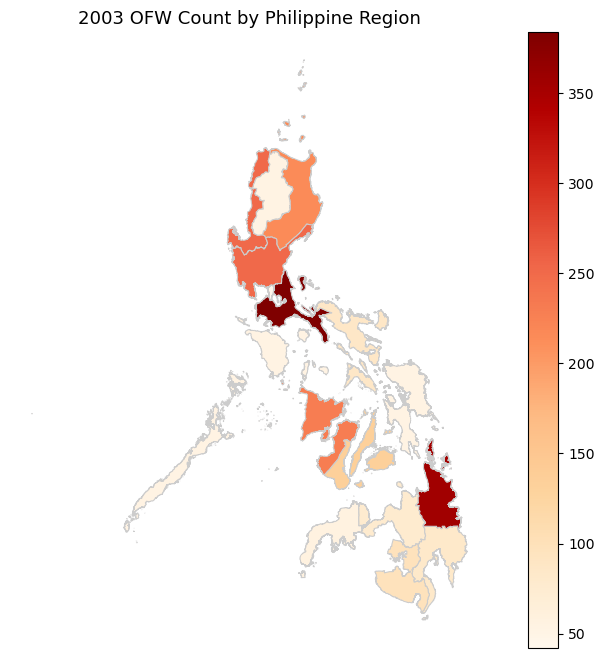

In [573]:
# Creating the chloropleth map for 2003
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2003.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2003 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2003.png", dpi=150)
plt.show()

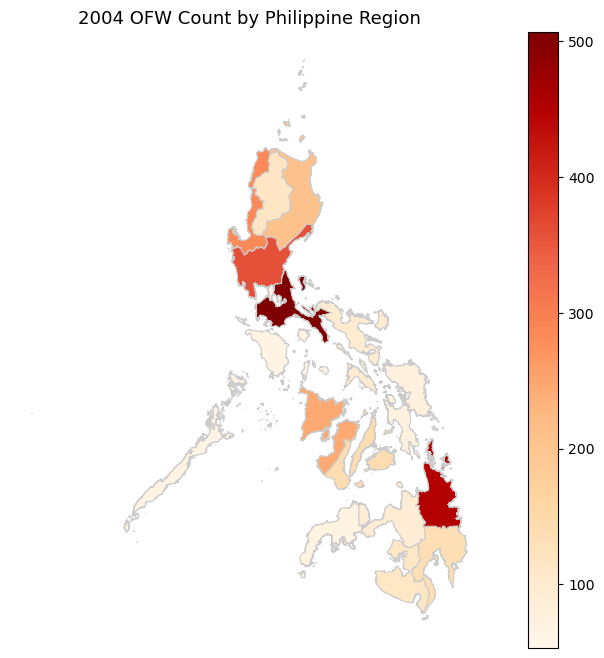

In [574]:
# Creating the chloropleth map for 2004
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2004.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2004 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2004.png", dpi=150)
plt.show()

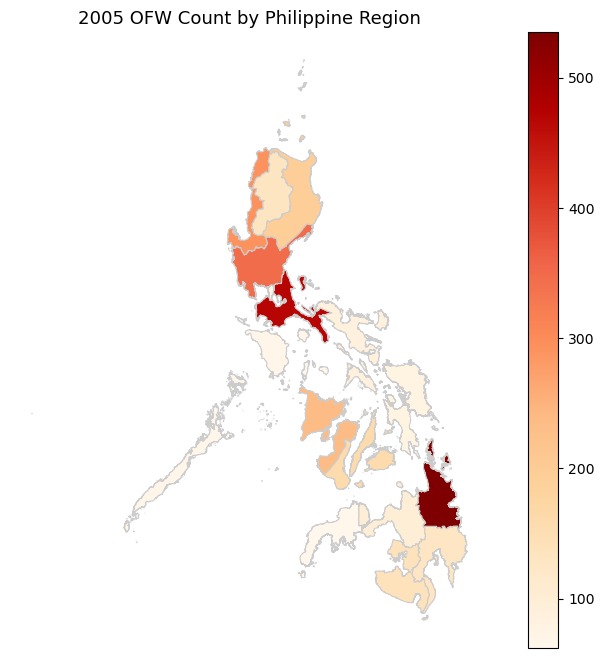

In [575]:
# Creating the chloropleth map for 2005
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2005.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2005 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2005.png", dpi=150)
plt.show()

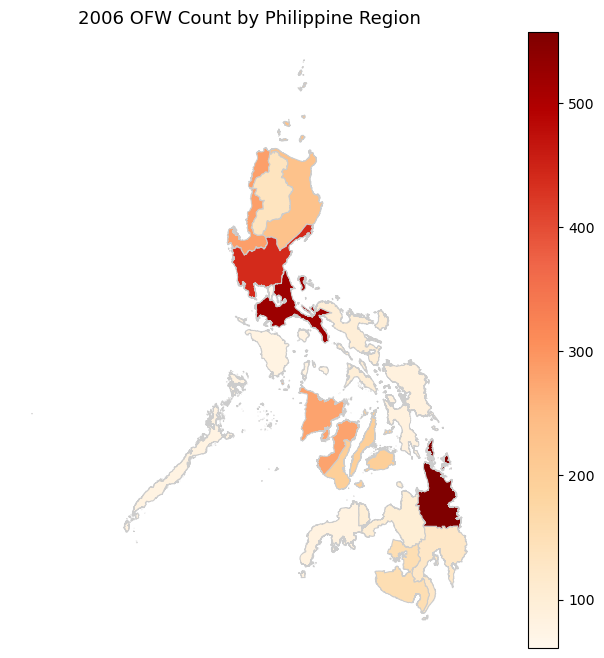

In [576]:
# Creating the chloropleth map for 2006
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2006.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2006 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2006.png", dpi=150)
plt.show()

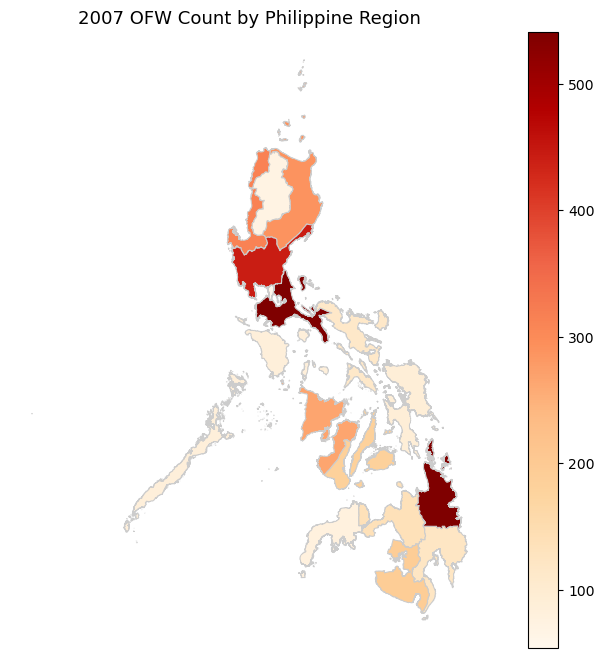

In [577]:
# Creating the chloropleth map for 2007
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2007.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2007 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2007.png", dpi=150)
plt.show()

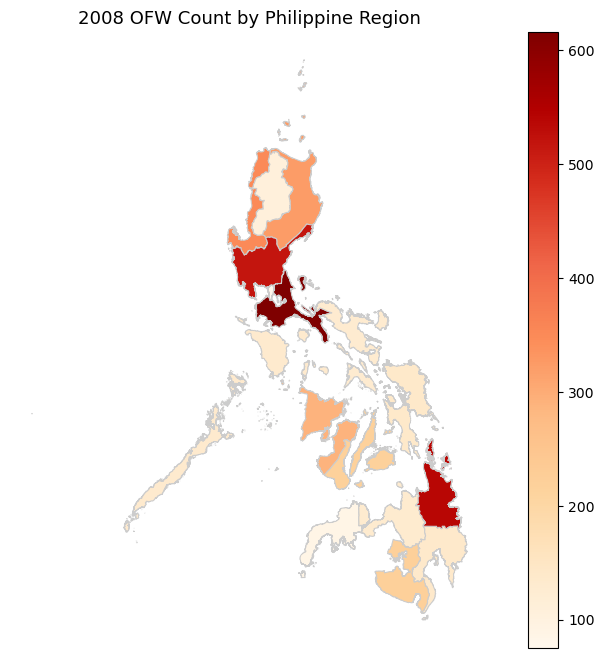

In [578]:
# Creating the chloropleth map for 2008
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2008.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2008 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2008.png", dpi=150)
plt.show()

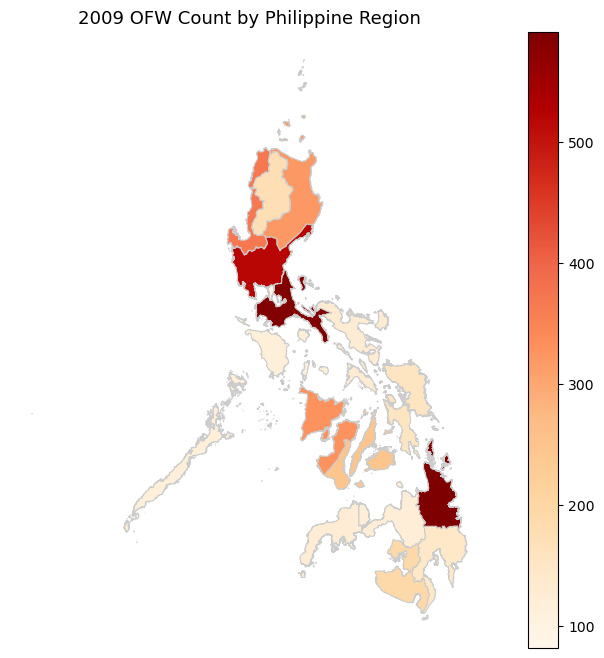

In [579]:
# Creating the chloropleth map for 2009
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2009.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2009 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2009.png", dpi=150)
plt.show()

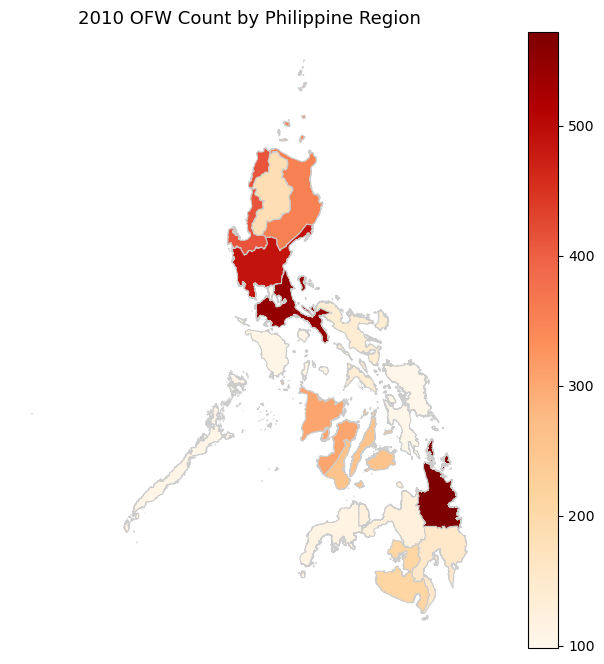

In [580]:
# Creating the chloropleth map for 2010
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2010.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2010 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2010.png", dpi=150)
plt.show()

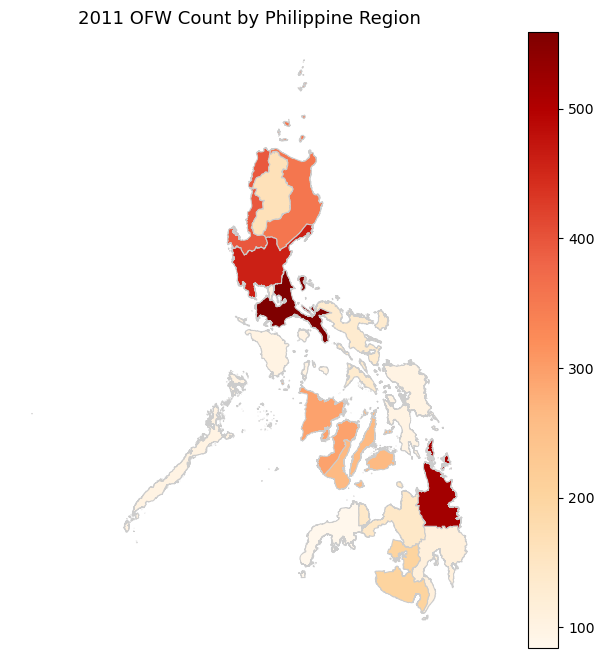

In [581]:
# Creating the chloropleth map for 2011
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2011.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2011 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2011.png", dpi=150)
plt.show()

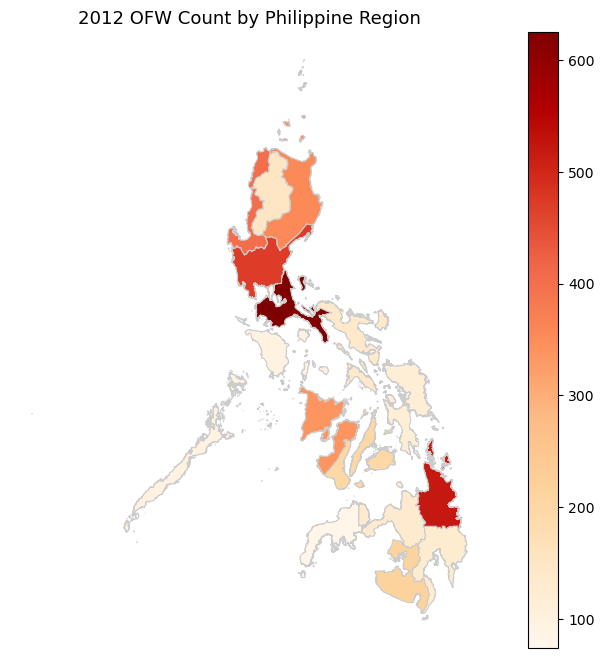

In [582]:
# Creating the chloropleth map for 2012
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2012.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2012 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2012.png", dpi=150)
plt.show()

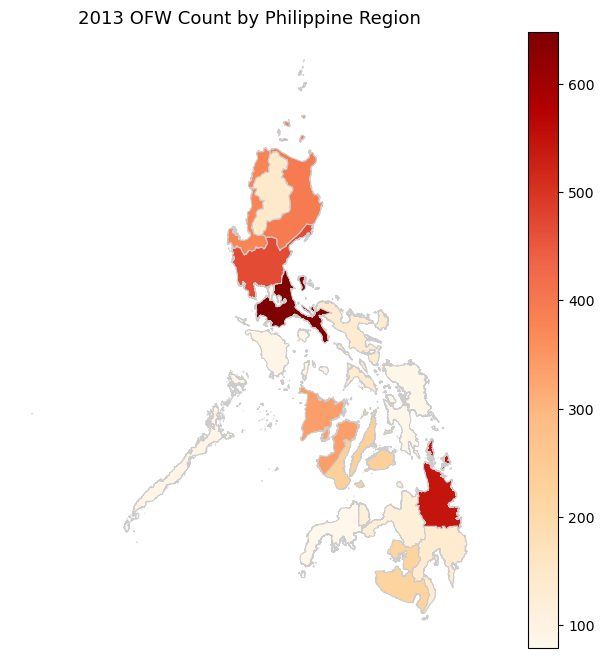

In [583]:
# Creating the chloropleth map for 2013
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2013.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2013 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2013.png", dpi=150)
plt.show()

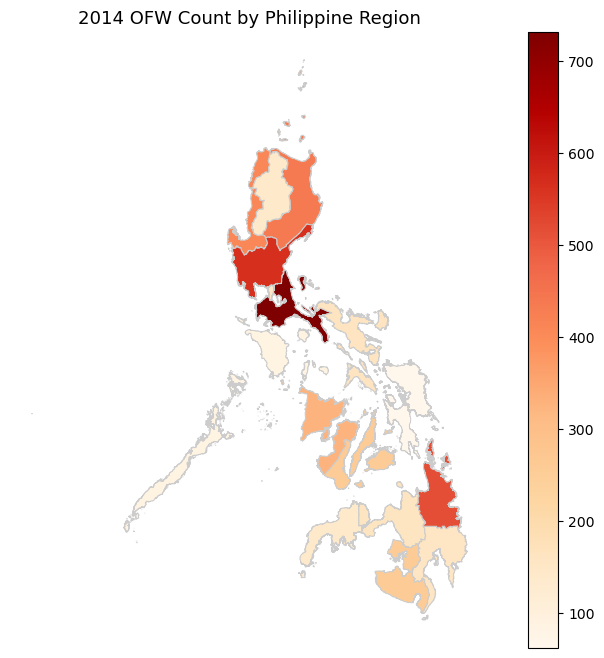

In [584]:
# Creating the chloropleth map for 2014
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2014.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2014 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2014.png", dpi=150)
plt.show()

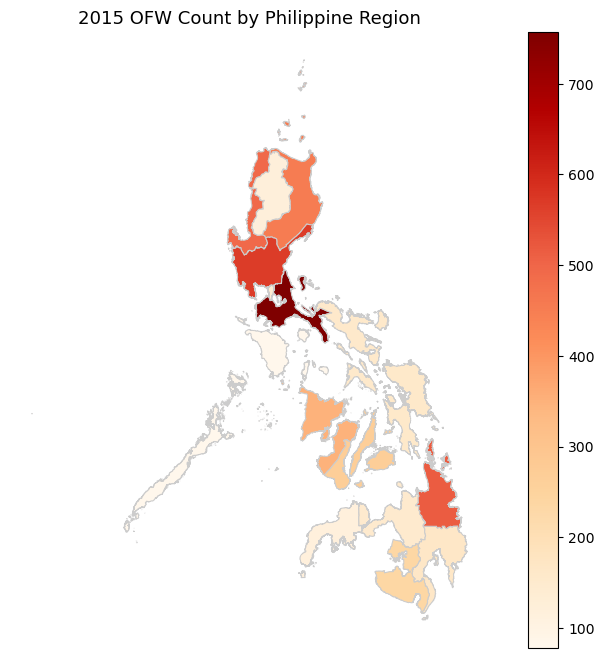

In [585]:
# Creating the chloropleth map for 2015
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2015.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2015 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2015.png", dpi=150)
plt.show()

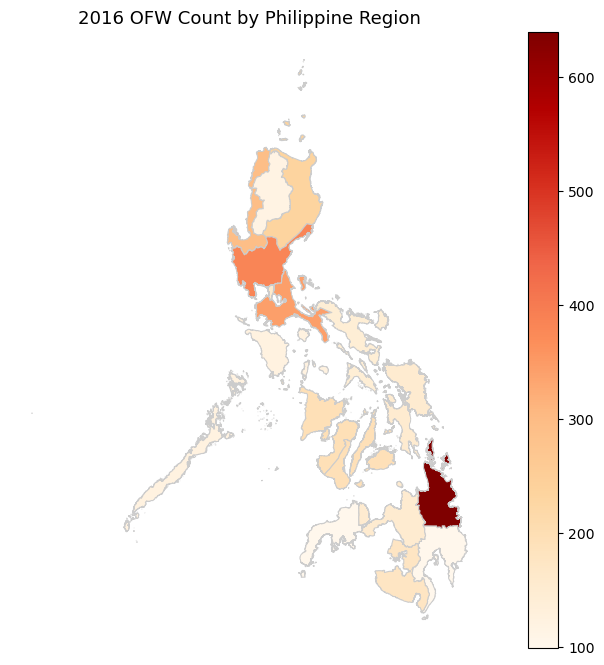

In [586]:
# Creating the chloropleth map for 2016
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2016.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2016 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2016.png", dpi=150)
plt.show()

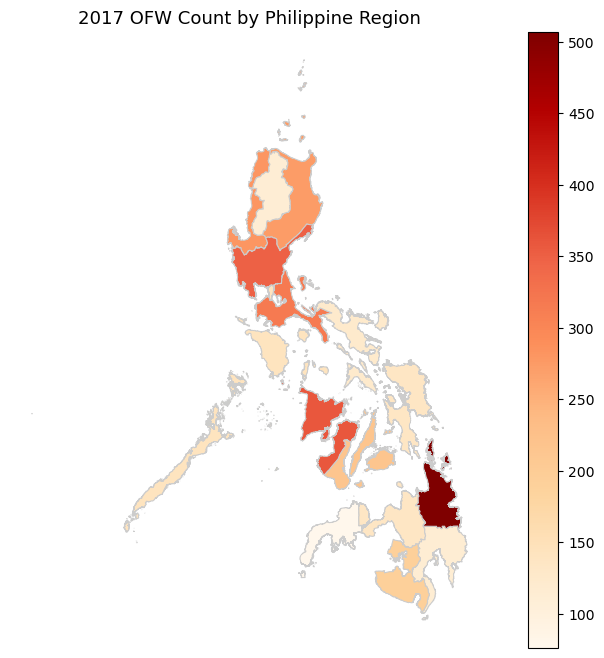

In [587]:
# Creating the chloropleth map for 2017
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2017.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2017 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2017.png", dpi=150)
plt.show()

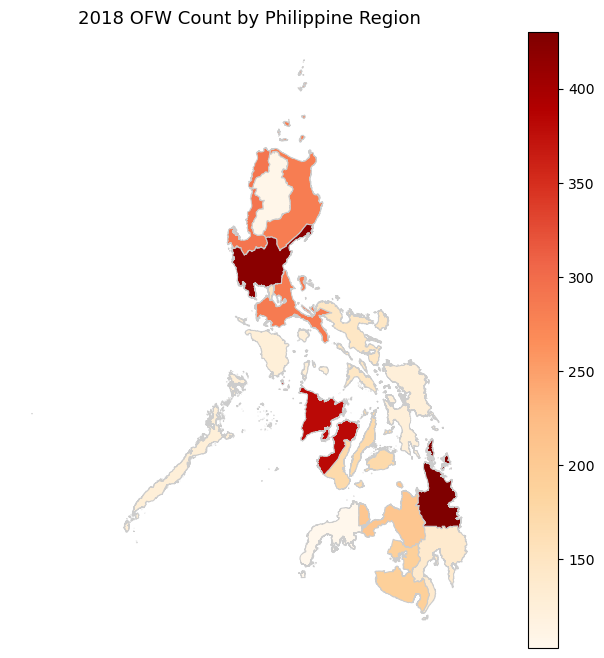

In [588]:
# Creating the chloropleth map for 2018
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2018.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2018 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2018.png", dpi=150)
plt.show()

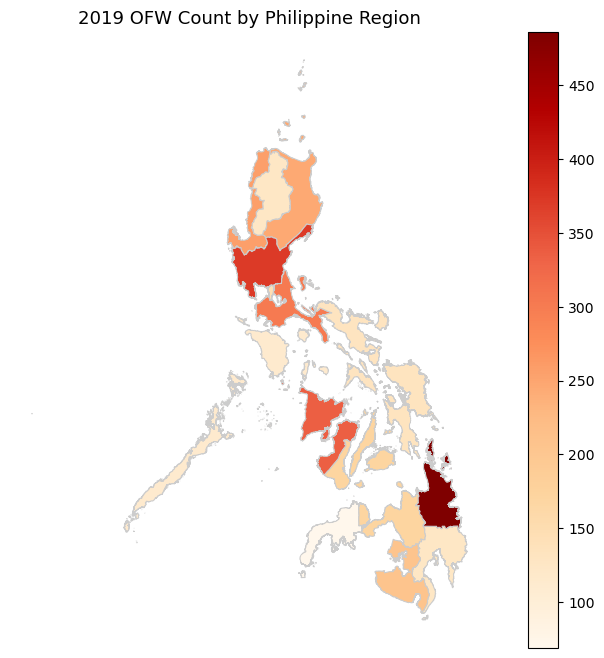

In [589]:
# Creating the chloropleth map for 2019
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2019.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2019 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2019.png", dpi=150)
plt.show()

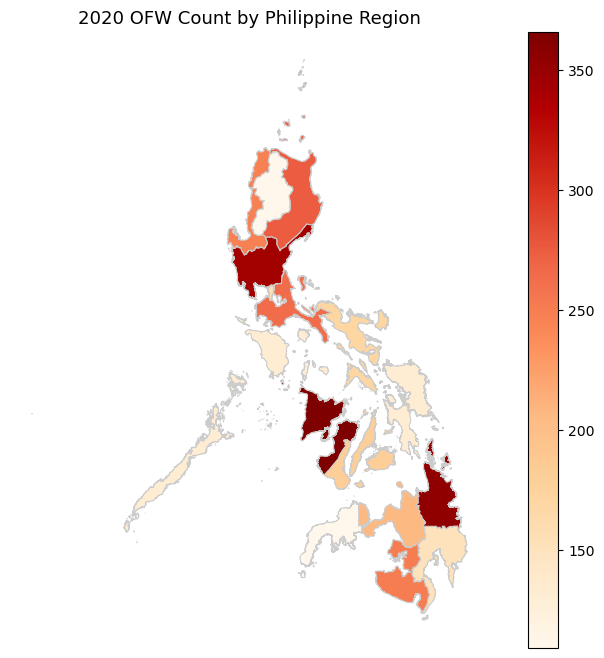

In [590]:
# Creating the chloropleth map for 2020
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_heatmap_2020.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Title
ax.set_title("2020 OFW Count by Philippine Region", fontsize=13)
plt.axis('off')

# Save and Show
plt.savefig("ofw_map_2020.png", dpi=150)
plt.show()

In [615]:
!pip install imageio
!pip install imageio[ffmpeg]
import imageio
import os

# Set your image directory and output file
image_folder = 'C:/Users/Shannen Mari/Documents/College/1. School Years/3rd Year/2nd Sem/ECON 138/Datasets/Survey on Overseas Filipinos/Microdata 1995-2023'

output_video = 'ofw_animation.mp4'
fps = 2.0

with imageio.get_writer(output_video, fps=fps) as writer:
    for img in images:
        writer.append_data(img)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 1200) to (1504, 1200) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [628]:
from IPython.display import Video
Video("ofw_animation.mp4", embed=True, width=600, height=500)

# Limited to 2003-2020 because Mimaropa and Calabarzon only became separate regions in 2002. 